In [192]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [193]:
df = pd.read_csv("hcc_dataset.csv")

**DATA PREPROCESSING**

Analisar a percentagem de missing values, representado por "?", de cada atributo.

Gender             0.000000
Symptoms          10.909091
Alcohol            0.000000
HBsAg             10.303030
HBeAg             23.636364
HBcAb             14.545455
HCVAb              5.454545
Cirrhosis          0.000000
Endemic           23.636364
Smoking           24.848485
Diabetes           1.818182
Obesity            6.060606
Hemochro          13.939394
AHT                1.818182
CRI                1.212121
HIV                8.484848
NASH              13.333333
Varices           31.515152
Spleno             9.090909
PHT                6.666667
PVT                1.818182
Metastasis         2.424242
Hallmark           1.212121
Age                0.000000
Grams_day         29.090909
Packs_year        32.121212
PS                 0.000000
Encephalopathy     0.606061
Ascites            1.212121
INR                2.424242
AFP                4.848485
Hemoglobin         1.818182
MCV                1.818182
Leucocytes         1.818182
Platelets          1.818182
 Albumin           3

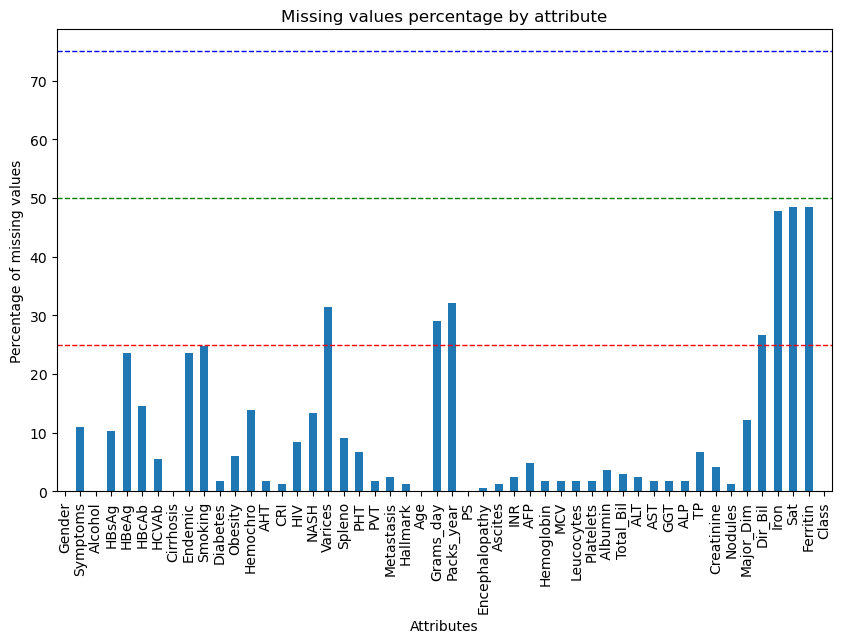

In [194]:
missing_counts = (df == "?").sum()
missing_percentage = (missing_counts / len(df)) * 100
print(missing_percentage)


plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Missing values percentage by attribute')
plt.xlabel('Attributes')
plt.ylabel('Percentage of missing values')

plt.axhline(y=25, color='r', linestyle='--', linewidth=1)
plt.axhline(y=50, color='g', linestyle='--', linewidth=1)
plt.axhline(y=75, color='b', linestyle='--', linewidth=1)

plt.show()

Não eliminamos variáveis pois nenhum atributo excede 50% de valores em falta.

Substituir valores "None" nas variáveis 'Encephalopathy' e 'Ascites' por "No" para não serem substituidos por NaN

In [195]:
df['Encephalopathy'].fillna("No", inplace=True)
df['Ascites'].fillna("No", inplace=True)

/tmp/ipykernel_8696/4110841508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Encephalopathy'].fillna("No", inplace=True)
/tmp/ipykernel_8696/4110841508.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Substituir todos os valores em falta ("?") por NaN

In [196]:
df.replace("?", np.nan, inplace=True)


Completar os atributos numéricos usando a mediana

In [197]:
# Lista das colunas numéricas que precisam ser tratadas
cols_to_process = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 
                   'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 
                   'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 
                   'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

# Converter para tipo numérico e substituir valores NaN pela mediana
for col in cols_to_process:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)



/tmp/ipykernel_8696/3116205539.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


Substituir variáveis binárias por 1 e 0.                                                                                                                       
Nas variáveis avaliadas por estado da doença (Grade I/II, Grade III/IV e Mild, Moderate/Severe) substituir por 1 ou 2, sendo 2 o estado mais avançado(pior).                                                                                                            
Na variável PS, onde é avaliado o estado da pessoa que o possui, avaliamos por ordem sendo 0 onde a pessoa está melhor(active) e 4 onde está pior(Disabled)

In [198]:
df.replace({"Yes": 1, "No": 0, "Female": 1, "Male": 0, "Lives": 1, "Dies": 0, "Grade I/II": 1, "Grade III/IV": 2, "Mild":1, "Moderate/Severe":2, "Active":0, "Selfcare":1, "Restricted":3, "Ambulatory": 2, "Disabled": 4}, inplace=True)

/tmp/ipykernel_8696/3176700790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0, "Female": 1, "Male": 0, "Lives": 1, "Dies": 0, "Grade I/II": 1, "Grade III/IV": 2, "Mild":1, "Moderate/Severe":2, "Active":0, "Selfcare":1, "Restricted":3, "Ambulatory": 2, "Disabled": 4}, inplace=True)


Preencher os valores ausentes com os valores mais frequentes em cada coluna

In [199]:
df = df.fillna(df.mode().iloc[0])

**Métodos de avaliação da qualidade das variáveis**

1. Feature Importance com Árvores de Decisão ou Random Forests: 
Os modelos baseados em árvores, como Árvores de Decisão e Random Forests, têm métodos embutidos para avaliar a importância das variáveis.
Os valores de importância das características retornados pelo RandomForestClassifier são números entre 0 e 1, e a soma de todas as importâncias é igual a 1. Aqui está um exemplo de como você pode interpretar esses valores:

           Feature  Importance
40             ALP    0.084795
30             AFP    0.072460
31      Hemoglobin    0.070927
46            Iron    0.066636
39             GGT    0.040003
34       Platelets    0.039688
29             INR    0.037464
38             AST    0.037307
32             MCV    0.037105
44       Major_Dim    0.035314
33      Leucocytes    0.033237
35         Albumin    0.032853
45         Dir_Bil    0.031938
23             Age    0.030341
36       Total_Bil    0.029758
42      Creatinine    0.029640
37             ALT    0.028214
48        Ferritin    0.027715
26              PS    0.026128
47             Sat    0.025600
41              TP    0.022502
24       Grams_day    0.016429
25      Packs_year    0.016191
20             PVT    0.015120
28         Ascites    0.014709
21      Metastasis    0.009974
1         Symptoms    0.009289
43         Nodules    0.008589
27  Encephalopathy    0.008507
3            HBsAg    0.007267
10        Diabetes    0.006778
8       

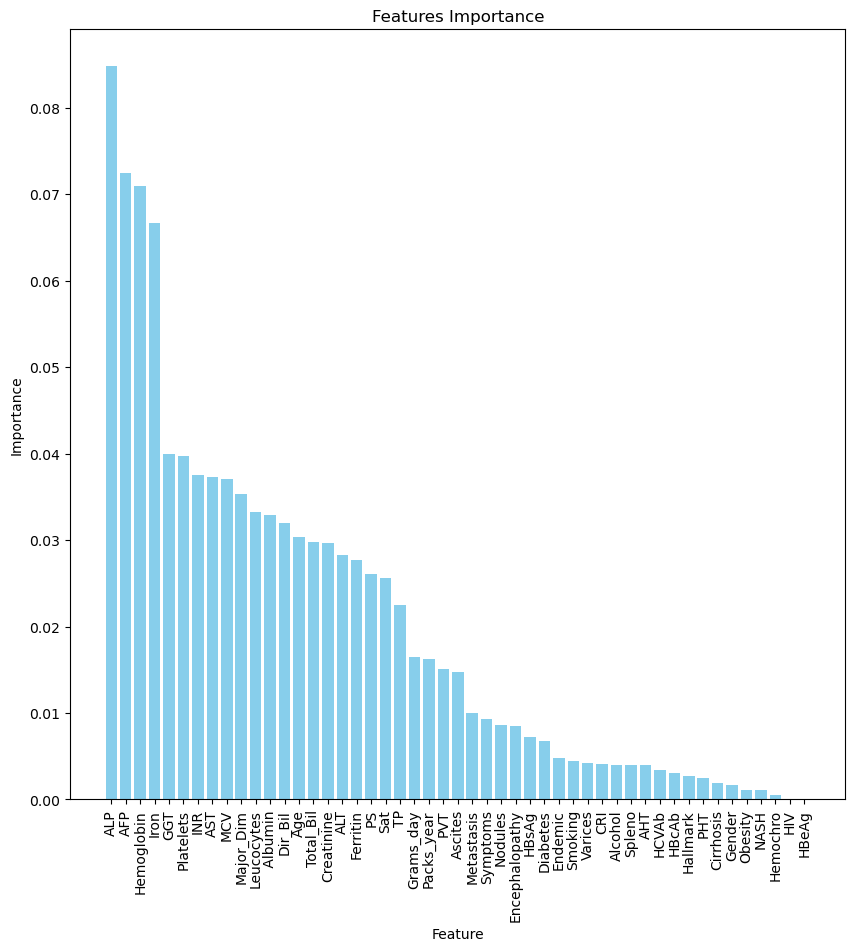

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Definir X (variáveis independentes) e y (variável dependente/target)
X = df.drop(columns=['Class'])  # Assumindo que 'Classe' é a coluna de target
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obter importâncias das características
importances = rf.feature_importances_
feature_names = X.columns

# Criar um DataFrame para visualizar as importâncias
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

#Visualização
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 10))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Features Importance')
plt.xticks(rotation=90)  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.show()



2. Seleção de Características com Recursive Feature Elimination (RFE)
O RFE é uma técnica de seleção de características que ajusta o modelo várias vezes, removendo as características menos importantes a cada vez.

In [201]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Treinar um modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Aplicar RFE
rfe = RFE(estimator=model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Obter ranking das características
ranking = rfe.ranking_
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print(feature_ranking)


/home/maria/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

           Feature  Ranking
20             PVT        1
1         Symptoms        2
10        Diabetes        3
13             AHT        4
28         Ascites        5
14             CRI        6
19             PHT        7
0           Gender        8
42      Creatinine        9
15             HIV       10
31      Hemoglobin       11
35         Albumin       12
17         Varices       13
9          Smoking       14
7        Cirrhosis       15
22        Hallmark       16
11         Obesity       17
2          Alcohol       18
16            NASH       19
44       Major_Dim       20
27  Encephalopathy       21
26              PS       22
6            HCVAb       23
18          Spleno       24
3            HBsAg       25
36       Total_Bil       26
43         Nodules       27
12        Hemochro       28
47             Sat       29
46            Iron       30
41              TP       31
29             INR       32
32             MCV       33
5            HBcAb       34
37             ALT  

3. Seleção de Características com SelectKBest:
O SelectKBest pode ser usado com uma função de pontuação para selecionar as melhores características. Para classificação, uma função comum é o chi2.

           Feature          Score
34       Platelets  453453.232501
30             AFP   22555.864043
33      Leucocytes    3568.077384
40             ALP    1699.420612
48        Ferritin     913.960361
39             GGT     595.140211
38             AST     245.121547
25      Packs_year     226.884533
46            Iron     217.601553
36       Total_Bil      51.117084
45         Dir_Bil      50.326209
44       Major_Dim      25.571515
47             Sat      15.616040
26              PS      12.280817
28         Ascites      10.001267
37             ALT       8.014371
20             PVT       7.594392
31      Hemoglobin       5.000520
41              TP       4.928658
21      Metastasis       4.511866
27  Encephalopathy       3.263431
10        Diabetes       2.902118
14             CRI       2.584047
1         Symptoms       2.427078
43         Nodules       2.018691
5            HBcAb       1.792201
0           Gender       1.765274
24       Grams_day       1.621724
32            

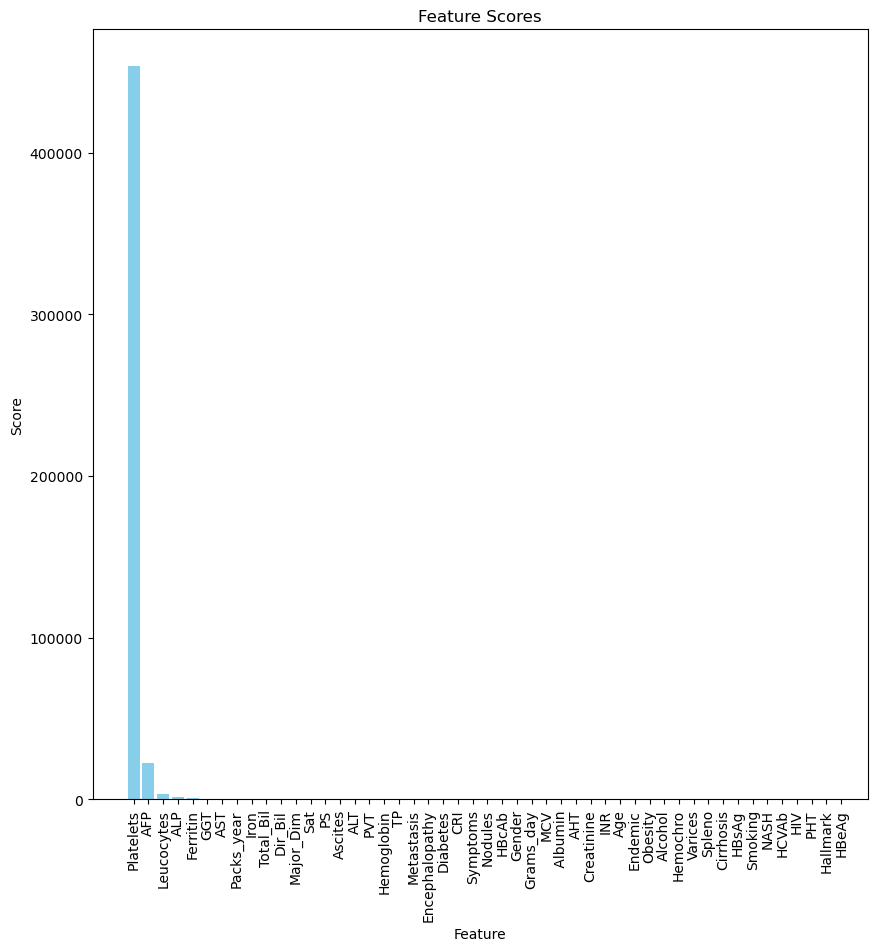

In [202]:
from sklearn.feature_selection import SelectKBest, chi2

# Aplicar SelectKBest
kbest = SelectKBest(score_func=chi2, k='all')
kbest.fit(X_train, y_train)

# Obter pontuações das características
scores = kbest.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)

#Visualização
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func=chi2, k='all')
kbest.fit(X_train, y_train)

# Obter pontuações das características
scores = kbest.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Ordenar o DataFrame por pontuação em ordem decrescente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Criar a tabela
plt.figure(figsize=(10, 10))
plt.bar(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.xticks(rotation=90) 
plt.show()


In [203]:
import pandas as pd
import numpy as np

# Resultados das técnicas
feature_importance_rf = pd.DataFrame({
    'Feature' :['ALP', 'AFP', 'Hemoglobin', 'Iron', 'GGT', 'Platelets', 'INR', 'AST', 'MCV', 'Major_Dim', 'Leucocytes', 'Albumin', 'Dir_Bil', 'Age', 'Total_Bil', 'Creatinine', 'ALT', 'Ferritin', 'PS', 'Sat', 'TP', 'Grams_day', 'Packs_year', 'PVT', 'Ascites', 'Metastasis', 'Symptoms', 'Nodules', 'Encephalopathy', 'HBsAg', 'Diabetes', 'Endemic', 'Smoking', 'Varices', 'CRI', 'Alcohol', 'Spleno', 'AHT', 'HCVAb', 'HBcAb', 'Hallmark', 'PHT', 'Cirrhosis', 'Gender', 'Obesity', 'NASH', 'Hemochro', 'HIV', 'HBeAg'],
    'Importance': [0.084795, 0.072460, 0.070927, 0.066636, 0.040003, 0.039688, 0.037464, 0.037307, 0.037105, 0.035314, 0.033237, 0.032853, 0.031938, 0.030341, 0.029758, 0.029640, 0.028214, 0.027715, 0.026128, 0.025600, 0.022502, 0.016429, 0.016191, 0.015120, 0.014709, 0.009974, 0.009289, 0.008589, 0.008507, 0.007267, 0.006778, 0.004740, 0.004491, 0.004233, 0.004121, 0.004017, 0.003985, 0.003951, 0.003383, 0.003105, 0.002659, 0.002533, 0.001901, 0.001676, 0.001132, 0.001071, 0.000524, 0.000000, 0.000000]
})

rfe_ranking = pd.DataFrame({
'Feature' : ['PVT', 'Symptoms', 'Diabetes', 'AHT', 'Ascites', 'CRI', 'PHT', 'Gender', 'Creatinine', 'HIV', 'Hemoglobin', 'Albumin', 'Varices', 'Smoking', 'Cirrhosis', 'Hallmark', 'Obesity', 'Alcohol', 'NASH', 'Major_Dim', 'Encephalopathy', 'PS', 'HCVAb', 'Spleno', 'HBsAg', 'Total_Bil', 'Nodules','Hemochro','Sat', 'Iron', 'TP', 'INR', 'MCV', 'HBcAb', 'ALT', 'AST', 'Metastasis', 'Packs_year', 'Endemic', 'ALP', 'Dir_Bil', 'Grams_day', 'Age', 'GGT', 'Ferritin', 'Leucocytes', 'Platelets', 'AFP', 'HBeAg'],
'Ranking' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
})

select_kbest_scores = pd.DataFrame({
'Feature':['Platelets', 'AFP', 'Leucocytes', 'ALP', 'Ferritin', 'GGT', 'AST', 'Packs_year', 'Iron', 'Total_Bil', 'Dir_Bil', 'Major_Dim', 'Sat', 'PS', 'Ascites', 'ALT', 'PVT', 'Hemoglobin', 'TP', 'Metastasis', 'Encephalopathy' , 'Diabetes', 'CRI','Symptoms', 'Nodules', 'HBcAb', 'Gender', 'Grams_day', 'MCV', 'Albumin', 'AHT', 'Creatinine', 'INR', 'Age', 'Endemic', 'Obesity', 'Alcohol','Hemochro','Varices','Spleno','Cirrhosis' , 'HBsAg', 'Smoking', 'NASH', 'HCVAb', 'HIV', 'PHT', 'Hallmark', 'HBeAg'],
'Score': [453453.232501, 22555.864043, 3568.077384, 1699.420612, 913.960361, 595.140211, 245.121547, 226.884533, 217.601553, 51.117084, 50.326209, 25.571515, 15.616040,12.280817,10.001267,8.014371, 7.594392, 5.000520,4.928658,4.511866, 3.265247, 2.902118, 2.584047, 2.427078, 2.018691, 1.792201, 1.765274, 1.621724, 1.419413, 1.124771, 0.942785, 0.686839, 0.663082, 0.437878, 0.395682, 0.305961, 0.277326, 0.041200, 0.040376, 0.036687, 0.035609, 0.028126, 0.022453, 0.014063, 0.007581, 0.007031, 0.005829, 0.002045, 0.000000]
})

all_features = sorted(set(feature_importance_rf['Feature']).union(rfe_ranking['Feature']).union(select_kbest_scores['Feature']))

# Criar dicionários para mapeamento
feature_importance_dict = dict(zip(feature_importance_rf['Feature'], feature_importance_rf['Importance']))
rfe_ranking_dict = dict(zip(rfe_ranking['Feature'], rfe_ranking['Ranking']))
select_kbest_scores_dict = dict(zip(select_kbest_scores['Feature'], select_kbest_scores['Score']))

# Preencher valores ausentes com NaN
feature_importance_filled = [feature_importance_dict.get(feature, np.nan) for feature in all_features]
rfe_ranking_filled = [rfe_ranking_dict.get(feature, np.nan) for feature in all_features]
select_kbest_scores_filled = [select_kbest_scores_dict.get(feature, np.nan) for feature in all_features]

# Criar DataFrame combinado
combined_df = pd.DataFrame({
    'Feature': all_features,
    'Feature Importance': feature_importance_filled,
    'RFE Ranking': rfe_ranking_filled,
    'Select KBest Score': select_kbest_scores_filled
})

# Normalizar as colunas (assumindo que quanto menor o ranking melhor e quanto maior a pontuação melhor)
combined_df['Normalized Feature Importance'] = combined_df['Feature Importance'] / combined_df['Feature Importance'].max()
combined_df['Normalized RFE Ranking'] = 1 - (combined_df['RFE Ranking'] / combined_df['RFE Ranking'].max())
combined_df['Normalized Select KBest Score'] = combined_df['Select KBest Score'] / combined_df['Select KBest Score'].max()

# Somar as colunas normalizadas para obter um ranking combinado
combined_df['Combined Score'] = (combined_df['Normalized Feature Importance'] + combined_df['Normalized RFE Ranking'] + combined_df['Normalized Select KBest Score']) / 3

# Ordenar pelo ranking combinado
combined_df_sorted = combined_df.sort_values(by='Combined Score', ascending=False)

print(combined_df_sorted)


           Feature  Feature Importance  RFE Ranking  Select KBest Score  \
27      Hemoglobin            0.070927           11            5.000520   
41       Platelets            0.039688           47       453453.232501   
2              ALP            0.084795           40         1699.420612   
29            Iron            0.066636           30          217.601553   
11      Creatinine            0.029640            9            0.686839   
39             PVT            0.015120            1            7.594392   
6          Albumin            0.032853           12            1.124771   
8          Ascites            0.014709            5           10.001267   
45        Symptoms            0.009289            2            2.427078   
12        Diabetes            0.006778            3            2.902118   
32       Major_Dim            0.035314           20           25.571515   
1              AHT            0.003951            4            0.942785   
9              CRI       

**Estes foram os resultados obtidos, por ordem decrescente de pontuação. Quanto mais para baixo, menos valiosa é a variável.**


| No |   Feature     | Combined Score |
|----|---------------|----------------|
| 27 | Hemoglobin    |    0.537325    |
| 41 | Platelets     |    0.502954    |
|  2 | ALP           |    0.395807    |
| 29 | Iron          |    0.391361    |
| 11 | Creatinine    |    0.388626    |
| 39 | PVT           |    0.385974    |
|  6 | Albumin       |    0.380848    |
|  8 | Ascites       |    0.357149    |
| 45 | Symptoms      |    0.356245    |
| 12 | Diabetes      |    0.339572    |
| 32 | Major_Dim     |    0.336119    |
|  1 | AHT           |    0.321655    |
|  9 | CRI           |    0.308719    |
|  0 | AFP           |    0.308227    |
| 37 | PHT           |    0.295672    |
| 38 | PS            |    0.286393    |
| 18 | Gender        |    0.285501    |
| 47 | Total_Bil     |    0.273480    |
| 24 | HIV           |    0.265306    |
| 28 | INR           |    0.262920    |
| 48 | Varices       |    0.261538    |
| 43 | Smoking       |    0.255750    |
| 31 | MCV           |    0.254706    |
| 10 | Cirrhosis     |    0.238765    |
| 42 | Sat           |    0.236701    |
|  4 | AST           |    0.235271    |
| 25 | Hallmark      |    0.234942    |
|  7 | Alcohol       |    0.226676    |
| 14 | Encephalopathy|    0.223920    |
| 36 | Obesity       |    0.222137    |
| 46 | TP            |    0.210909    |
| 34 | NASH          |    0.208292    |
|  3 | ALT           |    0.206155    |
| 22 | HBsAg         |    0.191832    |
| 17 | GGT           |    0.191705    |
| 23 | HCVAb         |    0.190169    |
| 44 | Spleno        |    0.185733    |
| 35 | Nodules       |    0.183425    |
| 13 | Dir_Bil       |    0.180009    |
|  5 | Age           |    0.160089    |
| 30 | Leucocytes    |    0.153687    |
| 26 | Hemochro      |    0.144917    |
| 40 | Packs_year    |    0.138644    |
| 16 | Ferritin      |    0.136832    |
| 33 | Metastasis    |    0.120844    |
| 20 | HBcAb         |    0.114248    |
| 19 | Grams_day     |    0.112203    |
| 15 | Endemic       |    0.086661    |
| 21 | HBeAg         |    0.000000    |



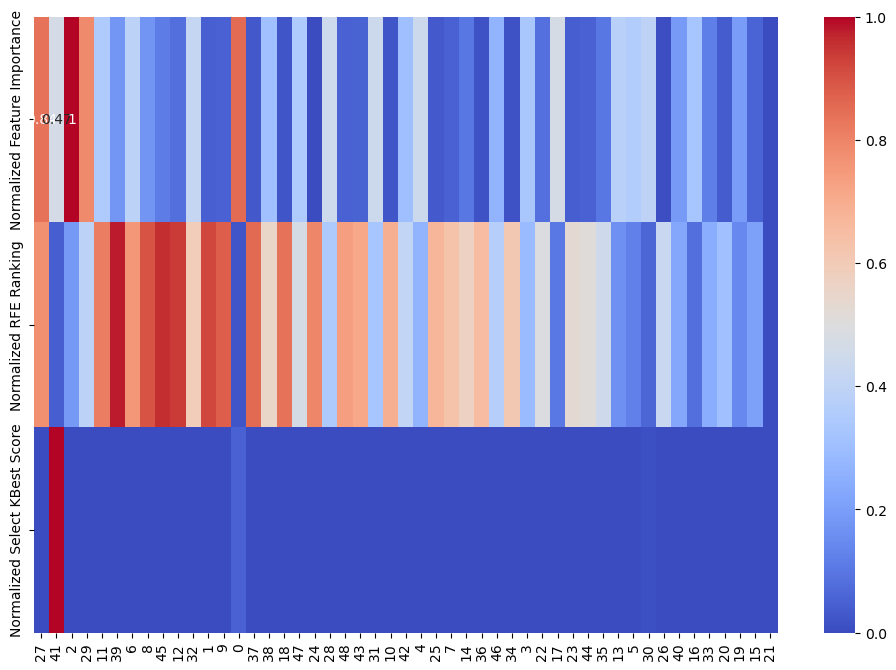

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap das pontuações normalizadas
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df_sorted[['Normalized Feature Importance', 'Normalized RFE Ranking', 'Normalized Select KBest Score']].T, annot=True, cmap='coolwarm')
plt.show()


Gráficos de cada atributo em relação a quem vive e morre para podermos analisar se retiramos mais alguma variável

<Figure size 800x600 with 0 Axes>

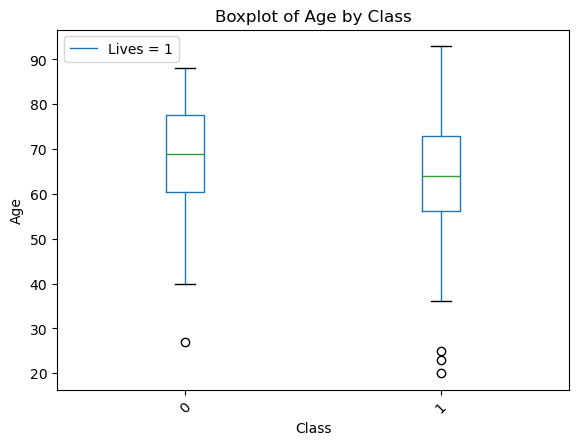

In [205]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Class', grid=False)
plt.title('Boxplot of Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()

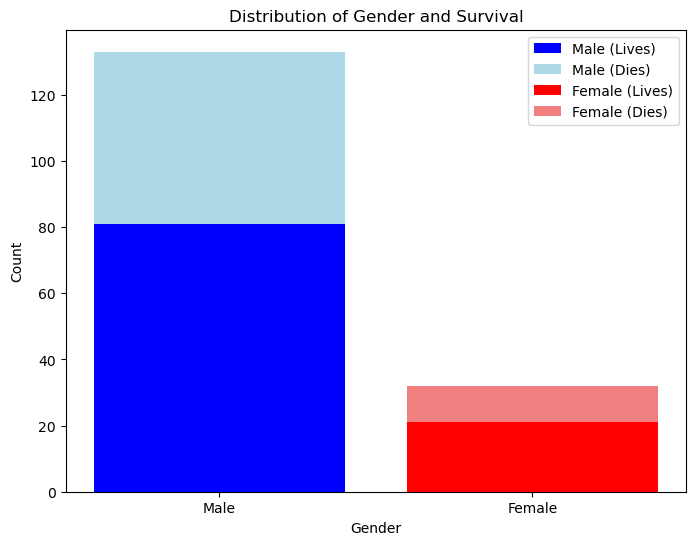

In [206]:

male_die = df[(df['Gender'] == 0) & (df['Class'] == 0)]['Gender'].count()
male_live = df[(df['Gender'] == 0) & (df['Class'] == 1)]['Gender'].count()
female_die = df[(df['Gender'] == 1) & (df['Class'] == 0)]['Gender'].count()
female_live = df[(df['Gender'] == 1) & (df['Class'] == 1)]['Gender'].count()

plt.figure(figsize=(8, 6))
bars1 = plt.bar(['Male'], [male_live], color='blue', label='Male (Lives)')
bars2 = plt.bar(['Male'], [male_die], bottom=[male_live], color='lightblue', label='Male (Dies)')
bars3 = plt.bar(['Female'], [female_live], color='red', label='Female (Lives)')
bars4 = plt.bar(['Female'], [female_die], bottom=[female_live], color='lightcoral', label='Female (Dies)')


plt.title('Distribution of Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.show()


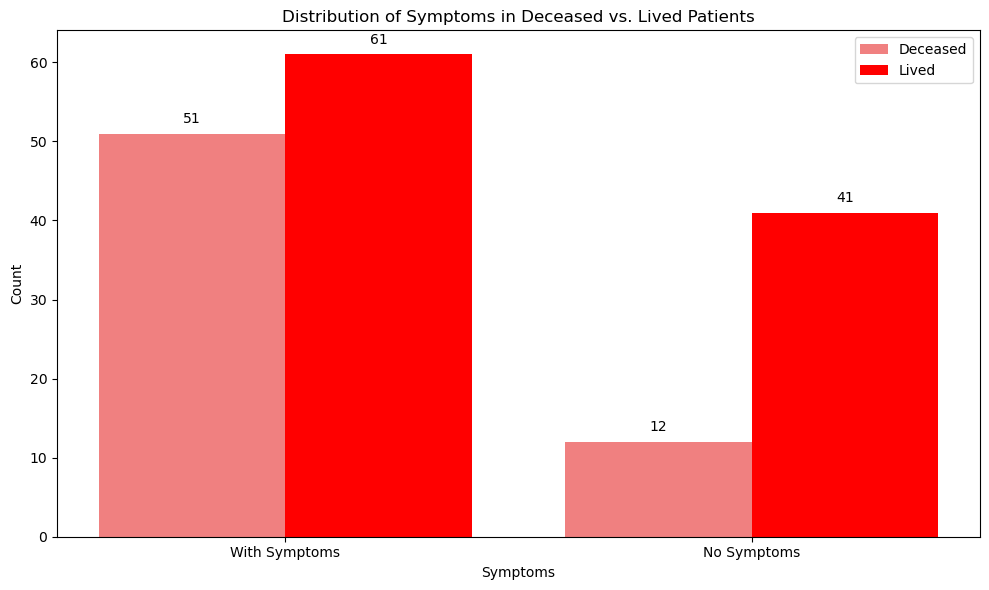

In [207]:

symptoms_die = df[(df['Symptoms'] == 1) & (df['Class'] == 0)]['Symptoms'].count()
no_symptoms_die = df[(df['Symptoms'] == 0) & (df['Class'] == 0)]['Symptoms'].count()
symptoms_live = df[(df['Symptoms'] == 1) & (df['Class'] == 1)]['Symptoms'].count()
no_symptoms_live = df[(df['Symptoms'] == 0) & (df['Class'] == 1)]['Symptoms'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [symptoms_die, no_symptoms_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [symptoms_live, no_symptoms_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Symptoms in Deceased vs. Lived Patients')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['With Symptoms', 'No Symptoms'])
plt.legend()
plt.tight_layout()
plt.show()



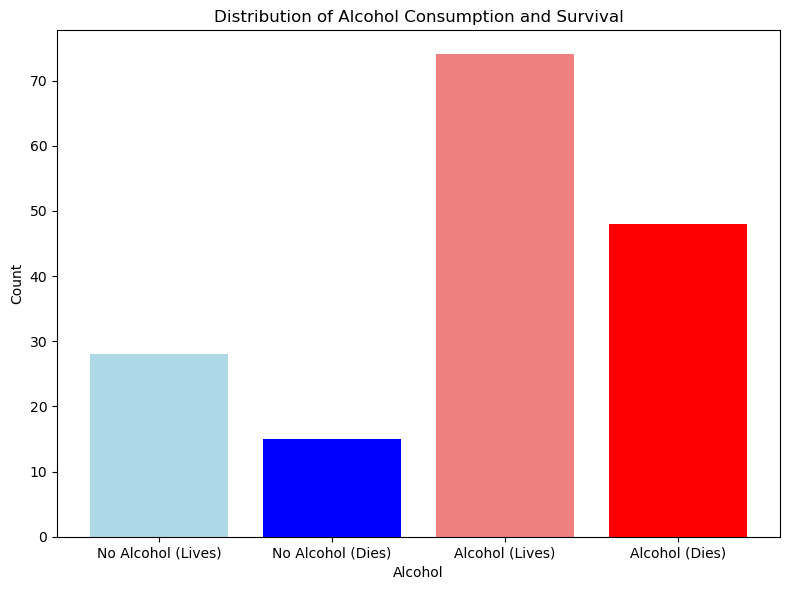

In [208]:


# Count the occurrences of males and females who live or die
no_alcohol_die = df[(df['Alcohol'] == 0) & (df['Class'] == 0)]['Alcohol'].count()
no_alcohol_live = df[(df['Alcohol'] == 0) & (df['Class'] == 1)]['Alcohol'].count()
alcohol_die = df[(df['Alcohol'] == 1) & (df['Class'] == 0)]['Alcohol'].count()
alcohol_live = df[(df['Alcohol'] == 1) & (df['Class'] == 1)]['Alcohol'].count()

# Plotting a stacked bar chart
plt.figure(figsize=(8, 6))
bars1 = plt.bar(['No Alcohol (Lives)'], [no_alcohol_live], color='lightblue')
bars2 = plt.bar(['No Alcohol (Dies)'], [no_alcohol_die], color='blue')
bars3 = plt.bar(['Alcohol (Lives)'], [alcohol_live], color='lightcoral')
bars4 = plt.bar(['Alcohol (Dies)'], [alcohol_die], color='red')
    
plt.title('Distribution of Alcohol Consumption and Survival')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


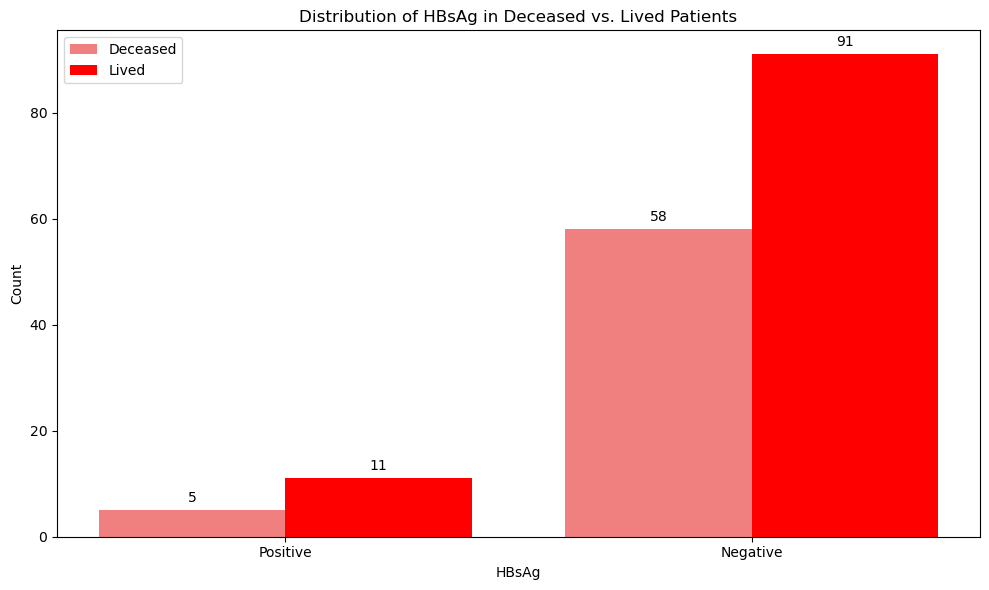

In [209]:


# Count the occurrences of people who die and live with and without HBsAg
hbsag_die = df[(df['HBsAg'] == 1) & (df['Class'] == 0)]['HBsAg'].count()
no_hbsag_die = df[(df['HBsAg'] == 0) & (df['Class'] == 0)]['HBsAg'].count()
hbsag_live = df[(df['HBsAg'] == 1) & (df['Class'] == 1)]['HBsAg'].count()
no_hbsag_live = df[(df['HBsAg'] == 0) & (df['Class'] == 1)]['HBsAg'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbsag_die, no_hbsag_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbsag_live, no_hbsag_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBsAg in Deceased vs. Lived Patients')
plt.xlabel('HBsAg')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


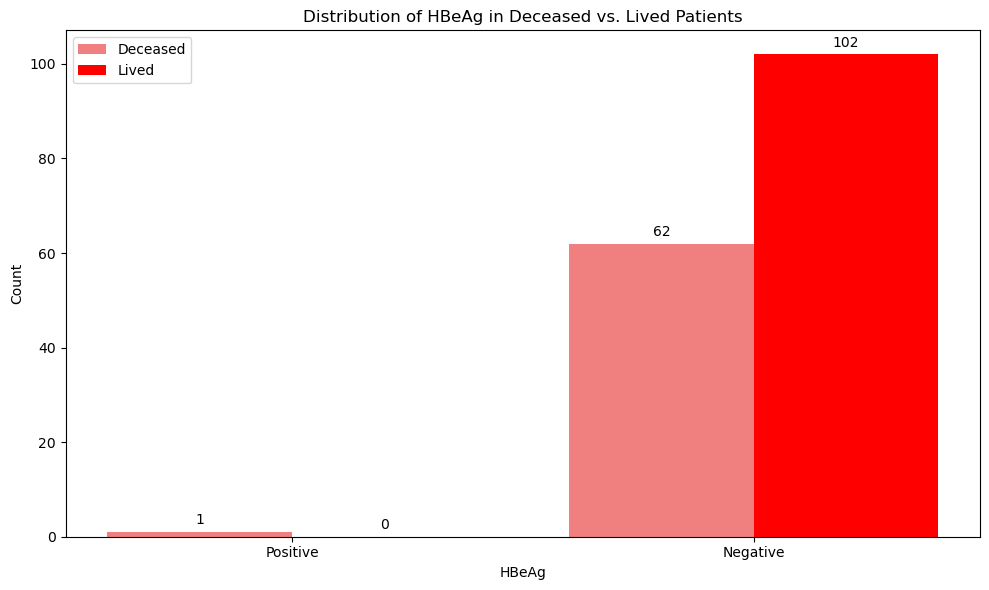

In [210]:


# Count the occurrences of people who die and live with and without HBeAg
hbeag_die = df[(df['HBeAg'] == 1) & (df['Class'] == 0)]['HBeAg'].count()
no_hbeag_die = df[(df['HBeAg'] == 0) & (df['Class'] == 0)]['HBeAg'].count()
hbeag_live = df[(df['HBeAg'] == 1) & (df['Class'] == 1)]['HBeAg'].count()
no_hbeag_live = df[(df['HBeAg'] == 0) & (df['Class'] == 1)]['HBeAg'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbeag_die, no_hbeag_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbeag_live, no_hbeag_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBeAg in Deceased vs. Lived Patients')
plt.xlabel('HBeAg')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


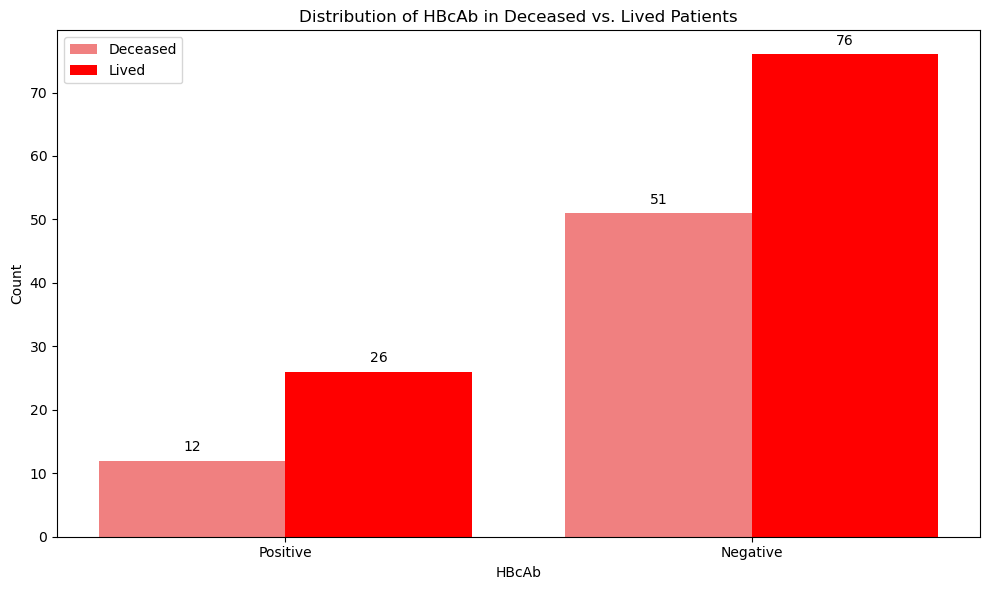

In [211]:


# Count the occurrences of people who die and live with and without HBcAb
hbcab_die = df[(df['HBcAb'] == 1) & (df['Class'] == 0)]['HBcAb'].count()
no_hbcab_die = df[(df['HBcAb'] == 0) & (df['Class'] == 0)]['HBcAb'].count()
hbcab_live = df[(df['HBcAb'] == 1) & (df['Class'] == 1)]['HBcAb'].count()
no_hbcab_live = df[(df['HBcAb'] == 0) & (df['Class'] == 1)]['HBcAb'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbcab_die, no_hbcab_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbcab_live, no_hbcab_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBcAb in Deceased vs. Lived Patients')
plt.xlabel('HBcAb')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


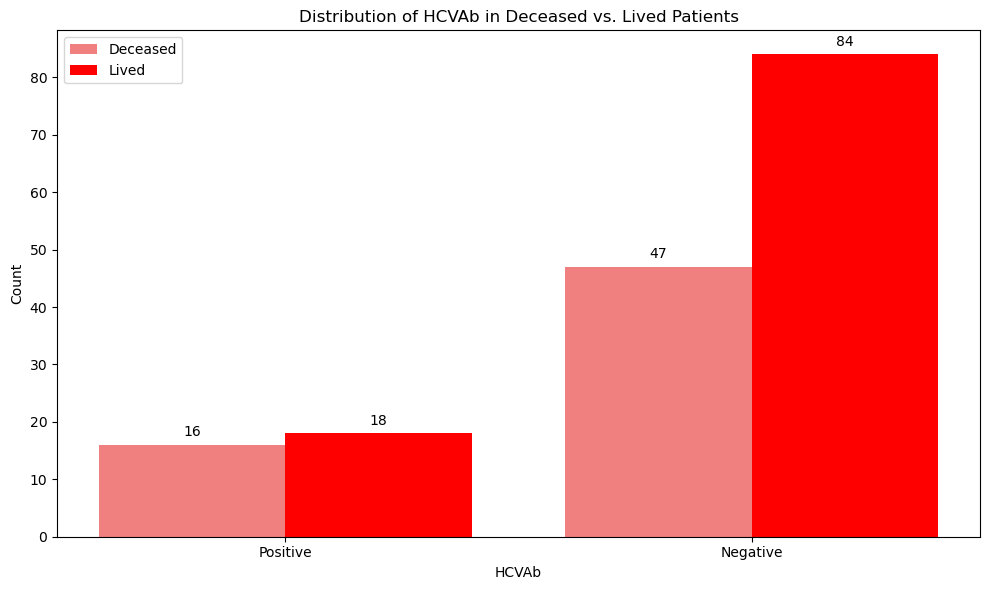

In [212]:


# Count the occurrences of people who die and live with and without HCVAb
hcvab_die = df[(df['HCVAb'] == 1) & (df['Class'] == 0)]['HCVAb'].count()
no_hcvab_die = df[(df['HCVAb'] == 0) & (df['Class'] == 0)]['HCVAb'].count()
hcvab_live = df[(df['HCVAb'] == 1) & (df['Class'] == 1)]['HCVAb'].count()
no_hcvab_live = df[(df['HCVAb'] == 0) & (df['Class'] == 1)]['HCVAb'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hcvab_die, no_hcvab_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hcvab_live, no_hcvab_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HCVAb in Deceased vs. Lived Patients')
plt.xlabel('HCVAb')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


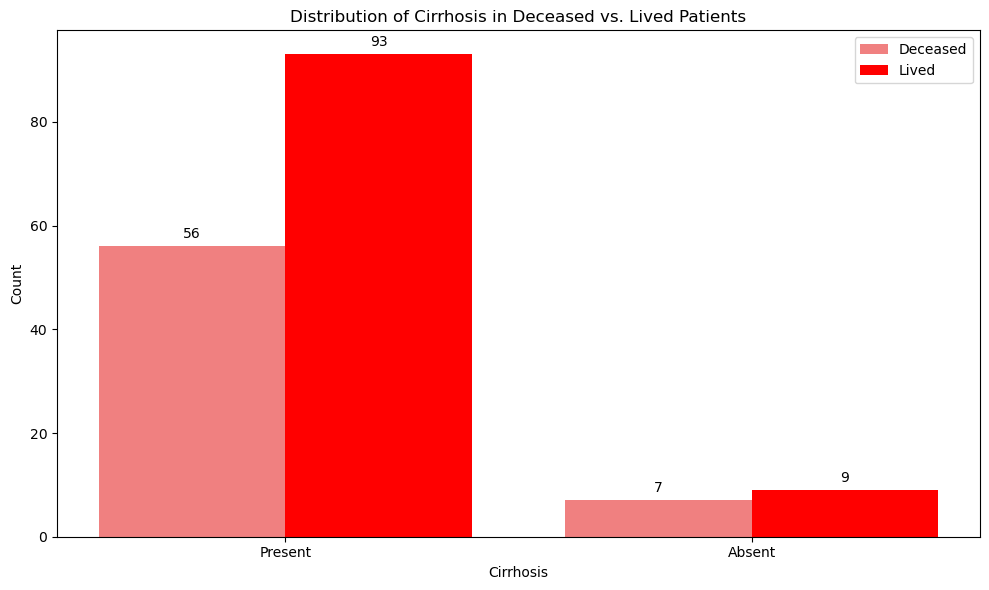

In [213]:


# Count the occurrences of people who die and live with and without Cirrhosis
cirrhosis_die = df[(df['Cirrhosis'] == 1) & (df['Class'] == 0)]['Cirrhosis'].count()
no_cirrhosis_die = df[(df['Cirrhosis'] == 0) & (df['Class'] == 0)]['Cirrhosis'].count()
cirrhosis_live = df[(df['Cirrhosis'] == 1) & (df['Class'] == 1)]['Cirrhosis'].count()
no_cirrhosis_live = df[(df['Cirrhosis'] == 0) & (df['Class'] == 1)]['Cirrhosis'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [cirrhosis_die, no_cirrhosis_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [cirrhosis_live, no_cirrhosis_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Cirrhosis in Deceased vs. Lived Patients')
plt.xlabel('Cirrhosis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


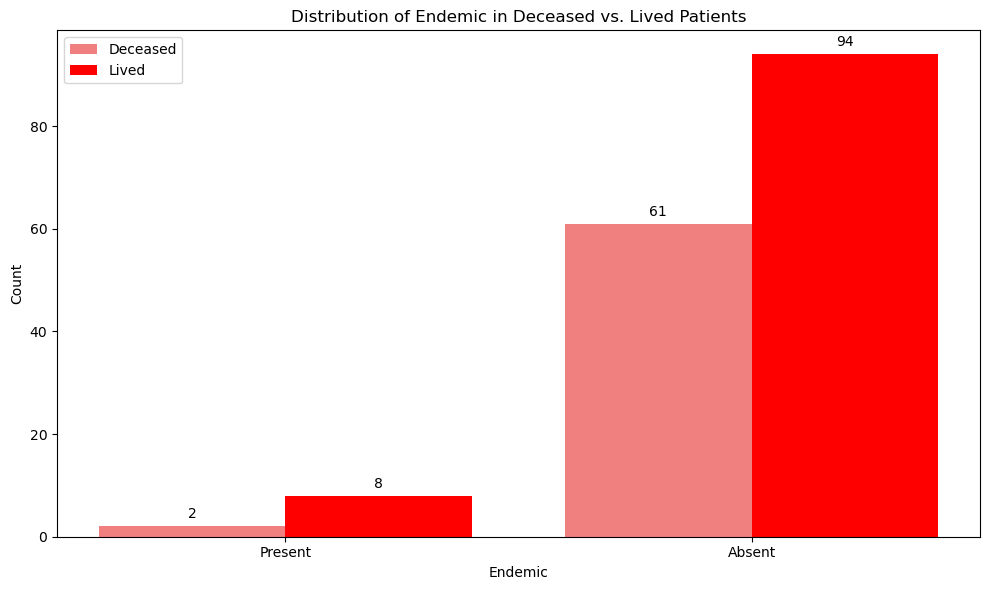

In [214]:


# Count the occurrences of people who die and live with and without Endemic
endemic_die = df[(df['Endemic'] == 1) & (df['Class'] == 0)]['Endemic'].count()
no_endemic_die = df[(df['Endemic'] == 0) & (df['Class'] == 0)]['Endemic'].count()
endemic_live = df[(df['Endemic'] == 1) & (df['Class'] == 1)]['Endemic'].count()
no_endemic_live = df[(df['Endemic'] == 0) & (df['Class'] == 1)]['Endemic'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [endemic_die, no_endemic_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [endemic_live, no_endemic_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Endemic in Deceased vs. Lived Patients')
plt.xlabel('Endemic')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


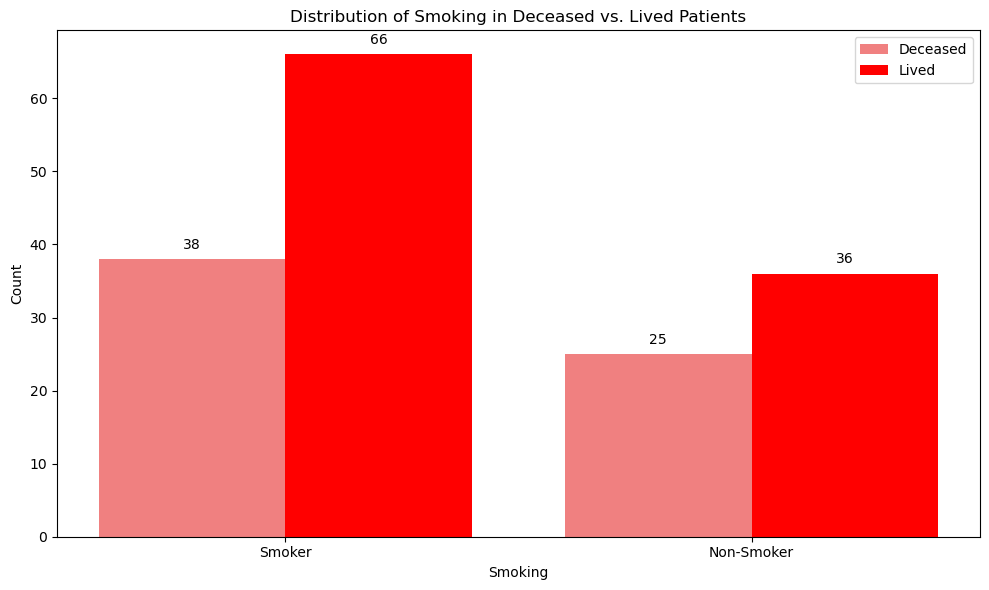

In [215]:


# Count the occurrences of people who die and live with and without Smoking
smoking_die = df[(df['Smoking'] == 1) & (df['Class'] == 0)]['Smoking'].count()
no_smoking_die = df[(df['Smoking'] == 0) & (df['Class'] == 0)]['Smoking'].count()
smoking_live = df[(df['Smoking'] == 1) & (df['Class'] == 1)]['Smoking'].count()
no_smoking_live = df[(df['Smoking'] == 0) & (df['Class'] == 1)]['Smoking'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [smoking_die, no_smoking_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [smoking_live, no_smoking_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Smoking in Deceased vs. Lived Patients')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Smoker', 'Non-Smoker'])
plt.legend()
plt.tight_layout()
plt.show()


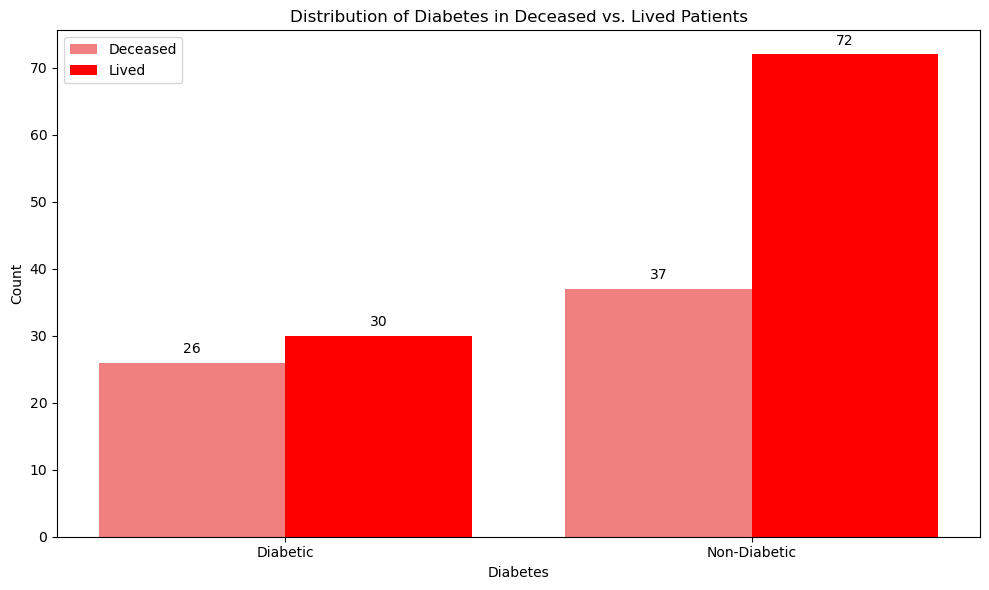

In [216]:


# Count the occurrences of people who die and live with and without Diabetes
diabetes_die = df[(df['Diabetes'] == 1) & (df['Class'] == 0)]['Diabetes'].count()
no_diabetes_die = df[(df['Diabetes'] == 0) & (df['Class'] == 0)]['Diabetes'].count()
diabetes_live = df[(df['Diabetes'] == 1) & (df['Class'] == 1)]['Diabetes'].count()
no_diabetes_live = df[(df['Diabetes'] == 0) & (df['Class'] == 1)]['Diabetes'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [diabetes_die, no_diabetes_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [diabetes_live, no_diabetes_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Diabetes in Deceased vs. Lived Patients')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Diabetic', 'Non-Diabetic'])
plt.legend()
plt.tight_layout()
plt.show()


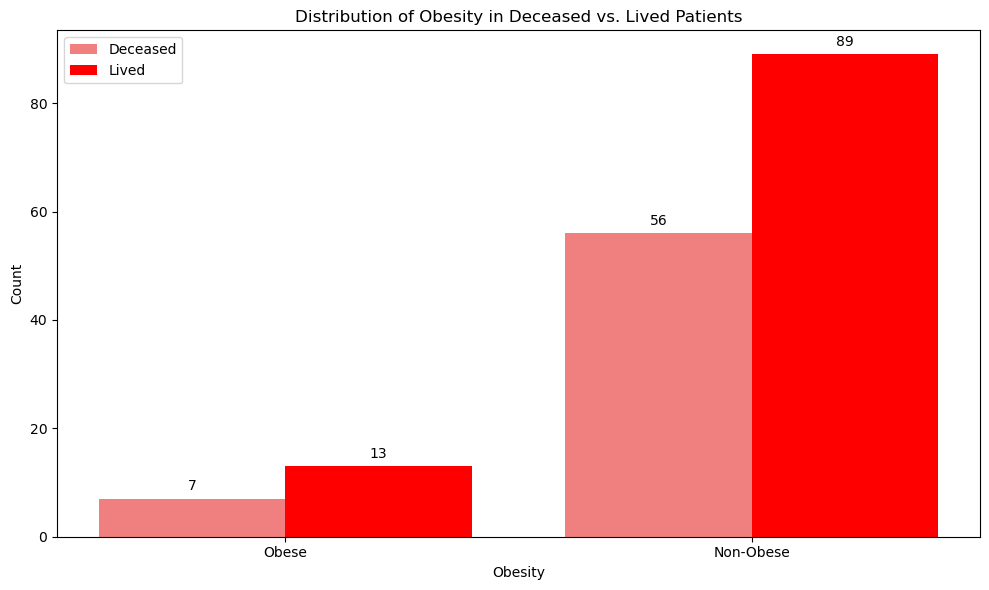

In [217]:


# Count the occurrences of people who die and live with and without Obesity
obesity_die = df[(df['Obesity'] == 1) & (df['Class'] == 0)]['Obesity'].count()
no_obesity_die = df[(df['Obesity'] == 0) & (df['Class'] == 0)]['Obesity'].count()
obesity_live = df[(df['Obesity'] == 1) & (df['Class'] == 1)]['Obesity'].count()
no_obesity_live = df[(df['Obesity'] == 0) & (df['Class'] == 1)]['Obesity'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [obesity_die, no_obesity_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [obesity_live, no_obesity_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Obesity in Deceased vs. Lived Patients')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Obese', 'Non-Obese'])
plt.legend()
plt.tight_layout()
plt.show()


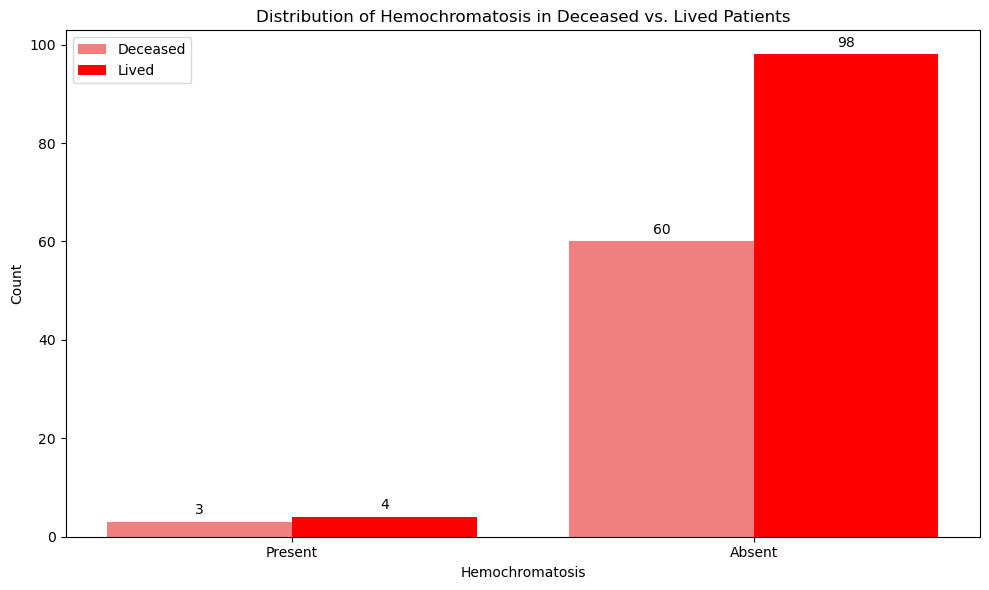

In [218]:


# Count the occurrences of people who die and live with and without Hemochromatosis
hemochro_die = df[(df['Hemochro'] == 1) & (df['Class'] == 0)]['Hemochro'].count()
no_hemochro_die = df[(df['Hemochro'] == 0) & (df['Class'] == 0)]['Hemochro'].count()
hemochro_live = df[(df['Hemochro'] == 1) & (df['Class'] == 1)]['Hemochro'].count()
no_hemochro_live = df[(df['Hemochro'] == 0) & (df['Class'] == 1)]['Hemochro'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hemochro_die, no_hemochro_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hemochro_live, no_hemochro_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Hemochromatosis in Deceased vs. Lived Patients')
plt.xlabel('Hemochromatosis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


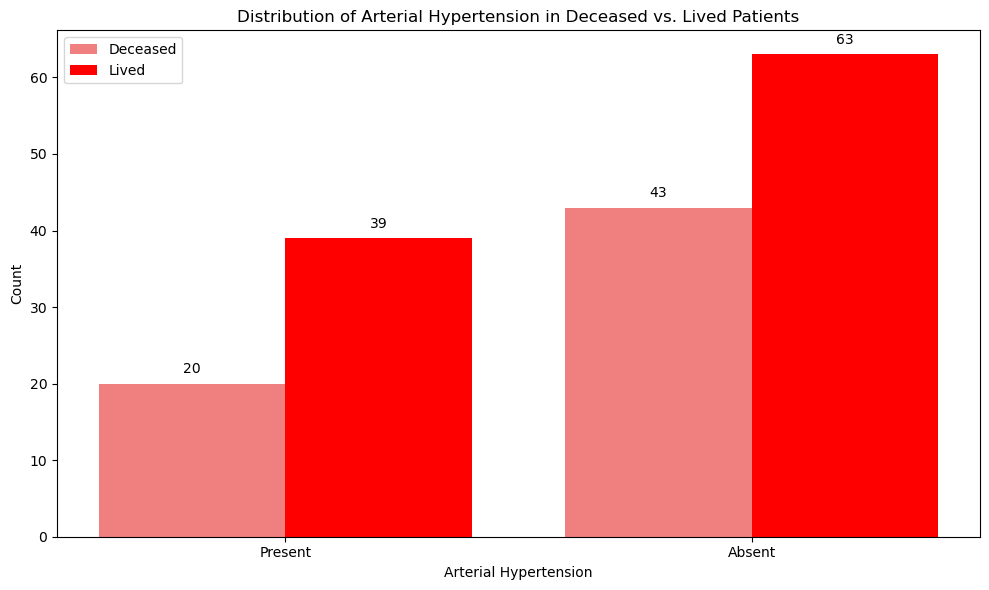

In [219]:


# Count the occurrences of people who die and live with and without Arterial Hypertension
aht_die = df[(df['AHT'] == 1) & (df['Class'] == 0)]['AHT'].count()
no_aht_die = df[(df['AHT'] == 0) & (df['Class'] == 0)]['AHT'].count()
aht_live = df[(df['AHT'] == 1) & (df['Class'] == 1)]['AHT'].count()
no_aht_live = df[(df['AHT'] == 0) & (df['Class'] == 1)]['AHT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [aht_die, no_aht_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [aht_live, no_aht_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Arterial Hypertension in Deceased vs. Lived Patients')
plt.xlabel('Arterial Hypertension')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


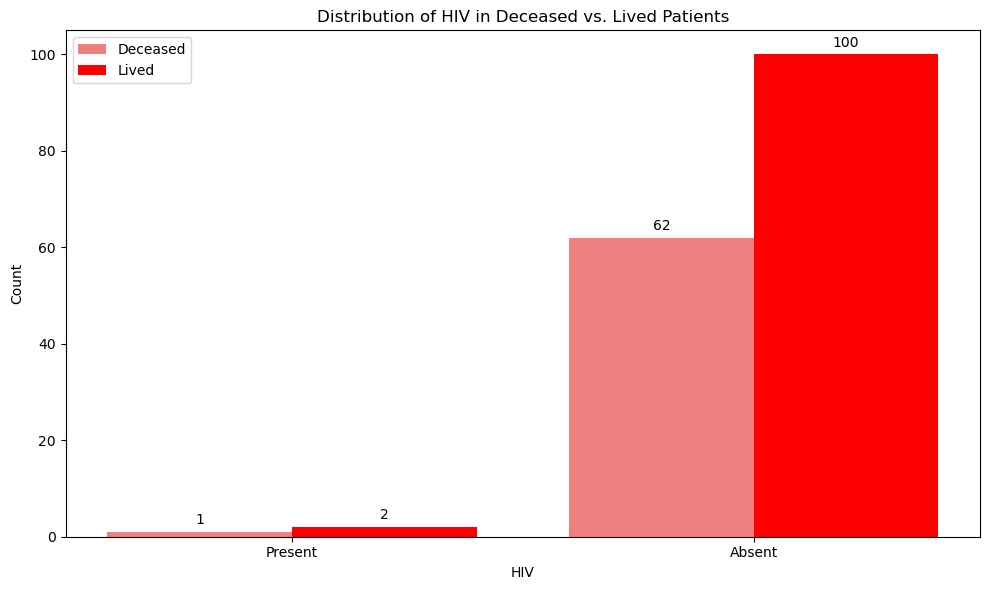

In [220]:


# Count the occurrences of people who die and live with and without HIV
hiv_die = df[(df['HIV'] == 1) & (df['Class'] == 0)]['HIV'].count()
no_hiv_die = df[(df['HIV'] == 0) & (df['Class'] == 0)]['HIV'].count()
hiv_live = df[(df['HIV'] == 1) & (df['Class'] == 1)]['HIV'].count()
no_hiv_live = df[(df['HIV'] == 0) & (df['Class'] == 1)]['HIV'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hiv_die, no_hiv_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hiv_live, no_hiv_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HIV in Deceased vs. Lived Patients')
plt.xlabel('HIV')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


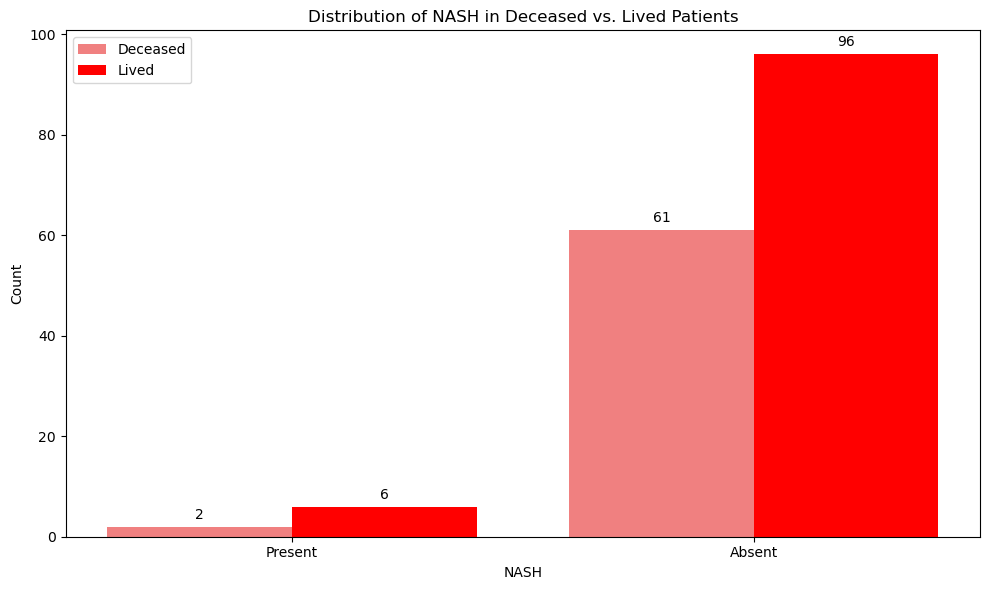

In [221]:


# Count the occurrences of people who die and live with and without NASH
nash_die = df[(df['NASH'] == 1) & (df['Class'] == 0)]['NASH'].count()
no_nash_die = df[(df['NASH'] == 0) & (df['Class'] == 0)]['NASH'].count()
nash_live = df[(df['NASH'] == 1) & (df['Class'] == 1)]['NASH'].count()
no_nash_live = df[(df['NASH'] == 0) & (df['Class'] == 1)]['NASH'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [nash_die, no_nash_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [nash_live, no_nash_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of NASH in Deceased vs. Lived Patients')
plt.xlabel('NASH')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


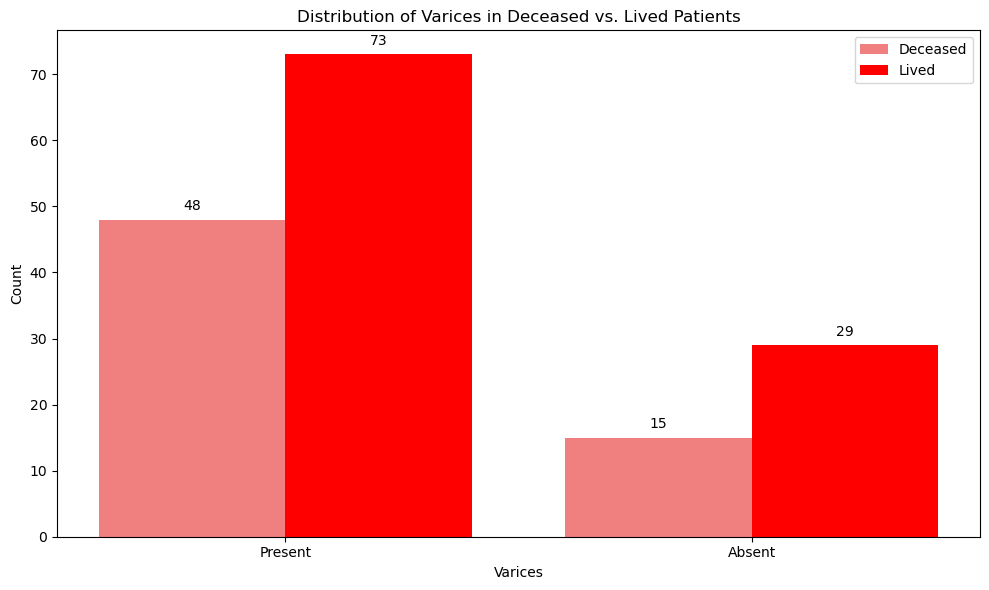

In [222]:


# Count the occurrences of people who die and live with and without Varices
varices_die = df[(df['Varices'] == 1) & (df['Class'] == 0)]['Varices'].count()
no_varices_die = df[(df['Varices'] == 0) & (df['Class'] == 0)]['Varices'].count()
varices_live = df[(df['Varices'] == 1) & (df['Class'] == 1)]['Varices'].count()
no_varices_live = df[(df['Varices'] == 0) & (df['Class'] == 1)]['Varices'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [varices_die, no_varices_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [varices_live, no_varices_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Varices in Deceased vs. Lived Patients')
plt.xlabel('Varices')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


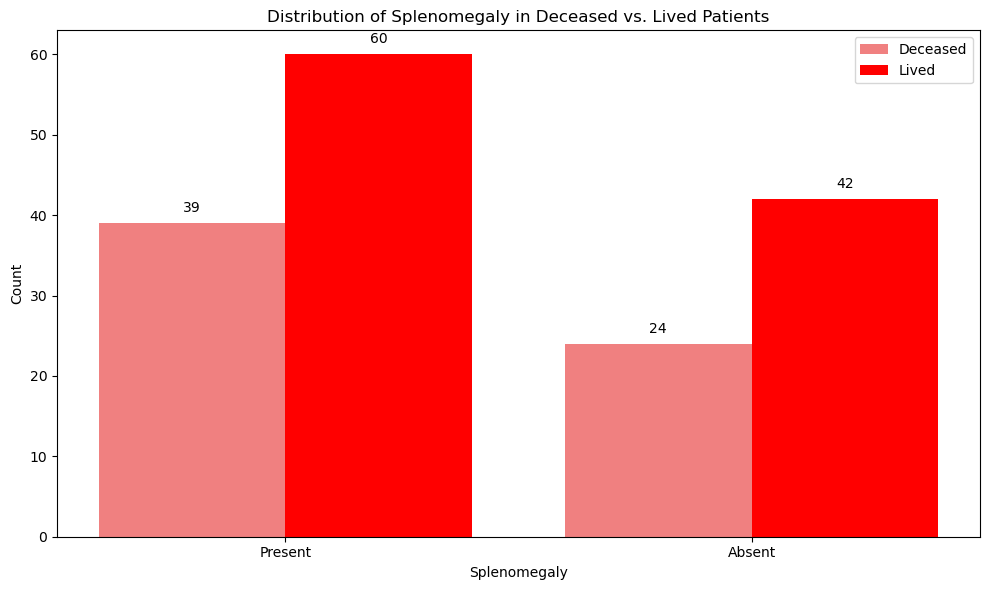

In [223]:


# Count the occurrences of people who die and live with and without Splenomegaly
spleno_die = df[(df['Spleno'] == 1) & (df['Class'] == 0)]['Spleno'].count()
no_spleno_die = df[(df['Spleno'] == 0) & (df['Class'] == 0)]['Spleno'].count()
spleno_live = df[(df['Spleno'] == 1) & (df['Class'] == 1)]['Spleno'].count()
no_spleno_live = df[(df['Spleno'] == 0) & (df['Class'] == 1)]['Spleno'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [spleno_die, no_spleno_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [spleno_live, no_spleno_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Splenomegaly in Deceased vs. Lived Patients')
plt.xlabel('Splenomegaly')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


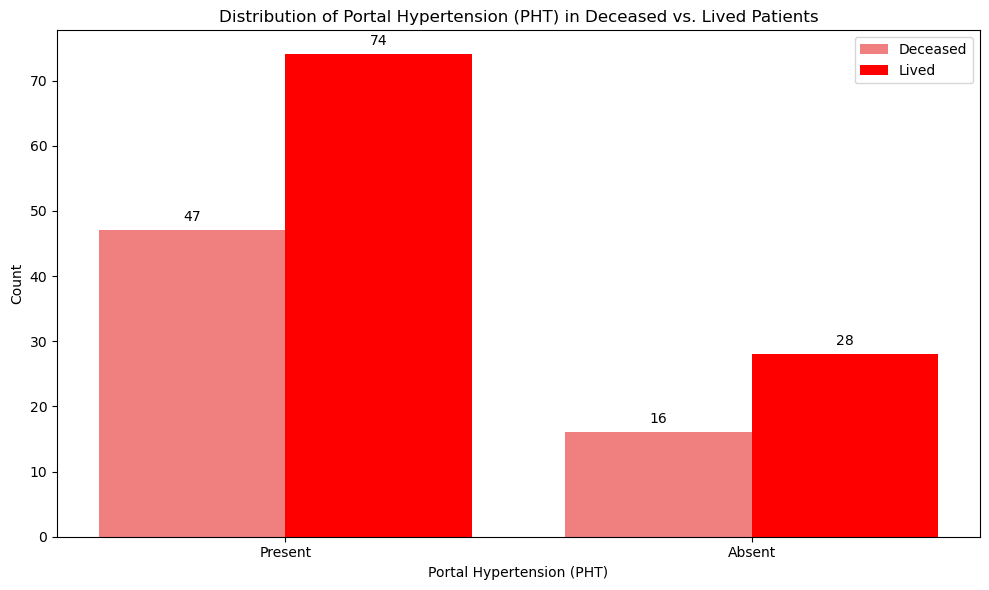

In [224]:


# Count the occurrences of people who die and live with and without Portal Hypertension (PHT)
pht_die = df[(df['PHT'] == 1) & (df['Class'] == 0)]['PHT'].count()
no_pht_die = df[(df['PHT'] == 0) & (df['Class'] == 0)]['PHT'].count()
pht_live = df[(df['PHT'] == 1) & (df['Class'] == 1)]['PHT'].count()
no_pht_live = df[(df['PHT'] == 0) & (df['Class'] == 1)]['PHT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [pht_die, no_pht_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [pht_live, no_pht_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Portal Hypertension (PHT) in Deceased vs. Lived Patients')
plt.xlabel('Portal Hypertension (PHT)')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


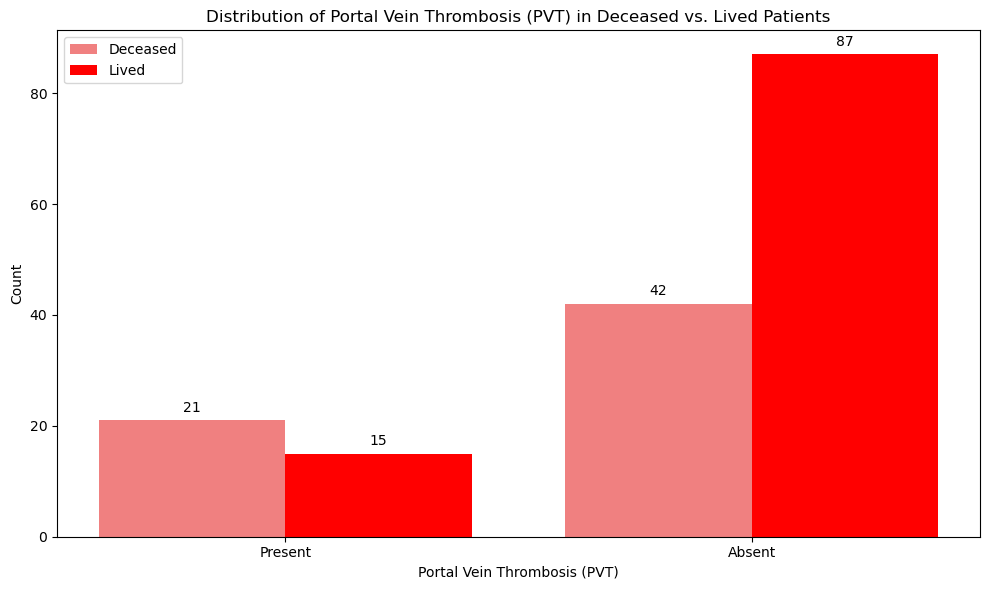

In [225]:


# Count the occurrences of people who die and live with and without Portal Vein Thrombosis (PVT)
pvt_die = df[(df['PVT'] == 1) & (df['Class'] == 0)]['PVT'].count()
no_pvt_die = df[(df['PVT'] == 0) & (df['Class'] == 0)]['PVT'].count()
pvt_live = df[(df['PVT'] == 1) & (df['Class'] == 1)]['PVT'].count()
no_pvt_live = df[(df['PVT'] == 0) & (df['Class'] == 1)]['PVT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [pvt_die, no_pvt_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [pvt_live, no_pvt_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Portal Vein Thrombosis (PVT) in Deceased vs. Lived Patients')
plt.xlabel('Portal Vein Thrombosis (PVT)')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


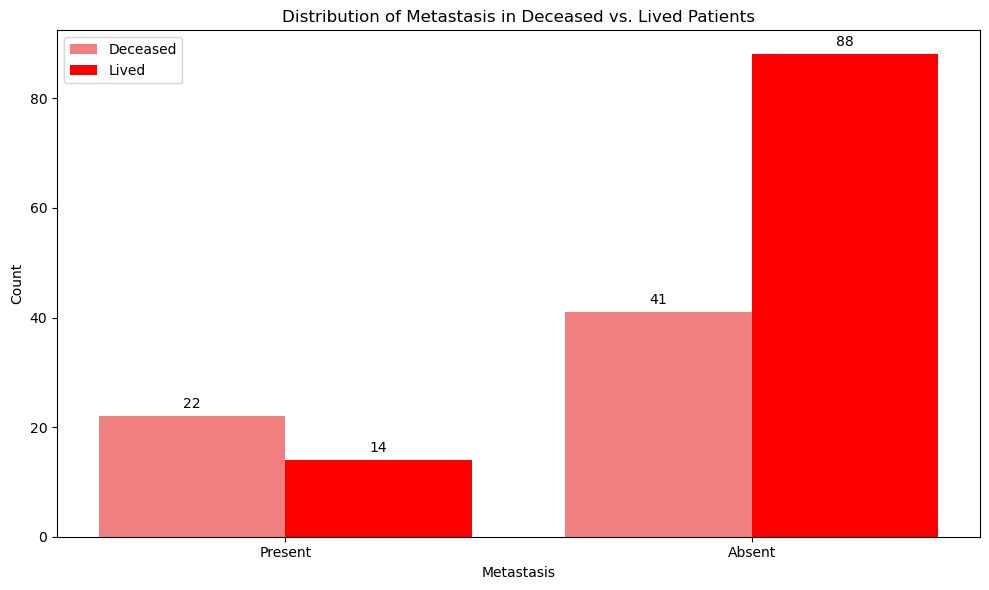

In [226]:


# Count the occurrences of people who die and live with and without Metastasis
meta_die = df[(df['Metastasis'] == 1) & (df['Class'] == 0)]['Metastasis'].count()
no_meta_die = df[(df['Metastasis'] == 0) & (df['Class'] == 0)]['Metastasis'].count()
meta_live = df[(df['Metastasis'] == 1) & (df['Class'] == 1)]['Metastasis'].count()
no_meta_live = df[(df['Metastasis'] == 0) & (df['Class'] == 1)]['Metastasis'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [meta_die, no_meta_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [meta_live, no_meta_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Metastasis in Deceased vs. Lived Patients')
plt.xlabel('Metastasis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


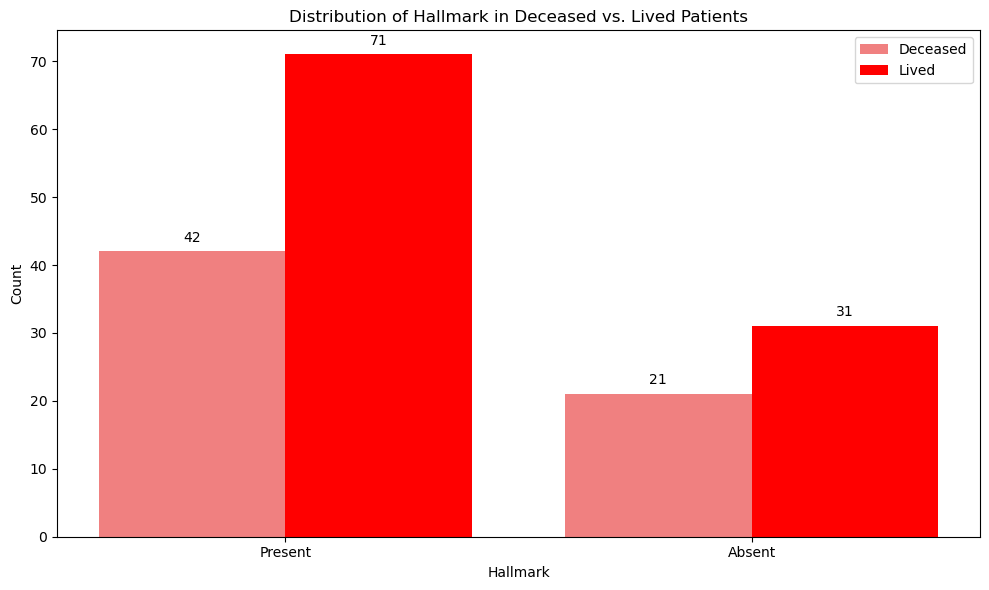

In [227]:


# Count the occurrences of people who die and live with and without Hallmark
hallmark_die = df[(df['Hallmark'] == 1) & (df['Class'] == 0)]['Hallmark'].count()
no_hallmark_die = df[(df['Hallmark'] == 0) & (df['Class'] == 0)]['Hallmark'].count()
hallmark_live = df[(df['Hallmark'] == 1) & (df['Class'] == 1)]['Hallmark'].count()
no_hallmark_live = df[(df['Hallmark'] == 0) & (df['Class'] == 1)]['Hallmark'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hallmark_die, no_hallmark_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hallmark_live, no_hallmark_live], width=0.4, color=['red',], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Hallmark in Deceased vs. Lived Patients')
plt.xlabel('Hallmark')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

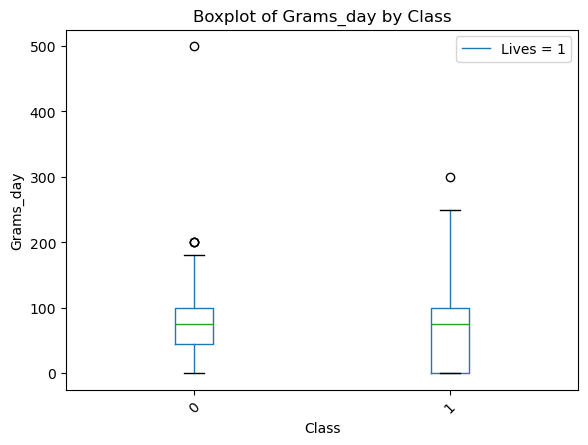

In [228]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Grams_day', by='Class', grid=False)
plt.title('Boxplot of Grams_day by Class')
plt.xlabel('Class')
plt.ylabel('Grams_day')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()

<Figure size 800x600 with 0 Axes>

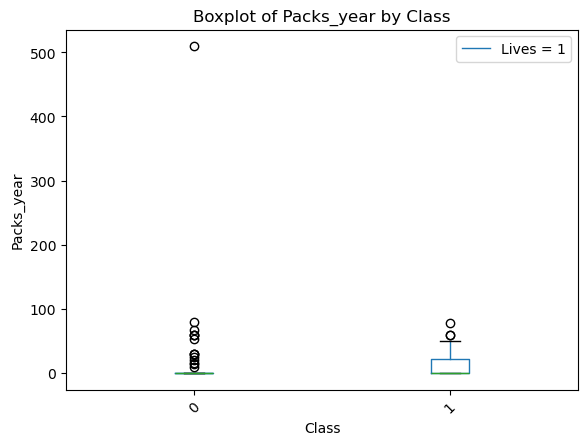

In [229]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Packs_year', by='Class', grid=False)
plt.title('Boxplot of Packs_year by Class')
plt.xlabel('Class')
plt.ylabel('Packs_year')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 1000x600 with 0 Axes>

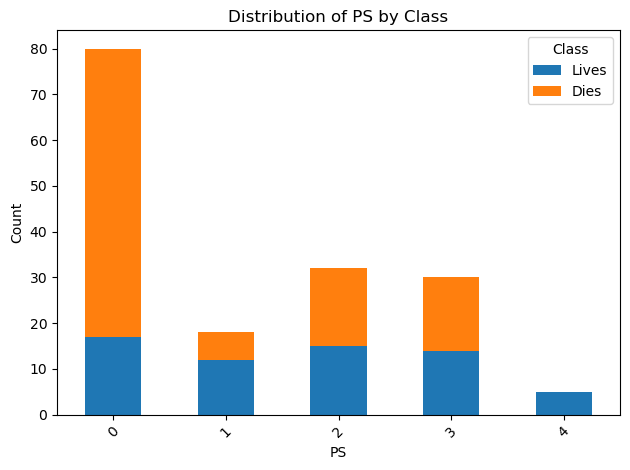

In [230]:

plt.figure(figsize=(10, 6))
df.groupby(['PS', 'Class']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of PS by Class')
plt.xlabel('PS')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Lives', 'Dies'])
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

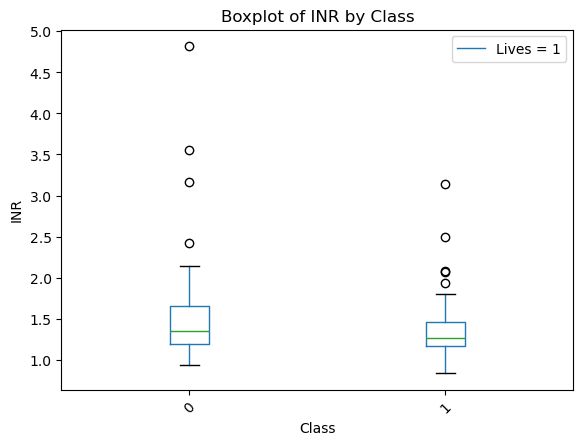

In [231]:

plt.figure(figsize=(8, 6))
df.boxplot(column='INR', by='Class', grid=False)
plt.title('Boxplot of INR by Class')
plt.xlabel('Class')
plt.ylabel('INR')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

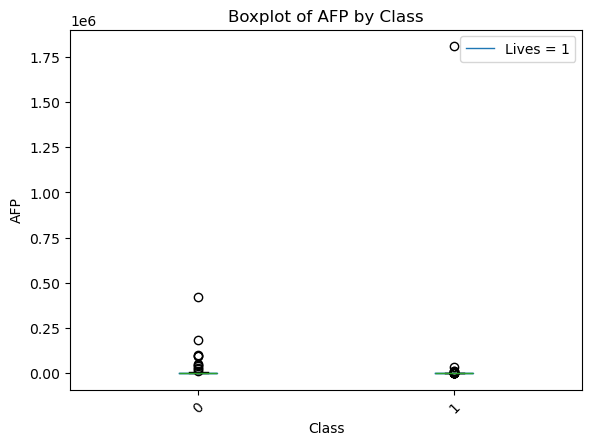

In [232]:

plt.figure(figsize=(8, 6))
df.boxplot(column='AFP', by='Class', grid=False)
plt.title('Boxplot of AFP by Class')
plt.xlabel('Class')
plt.ylabel('AFP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

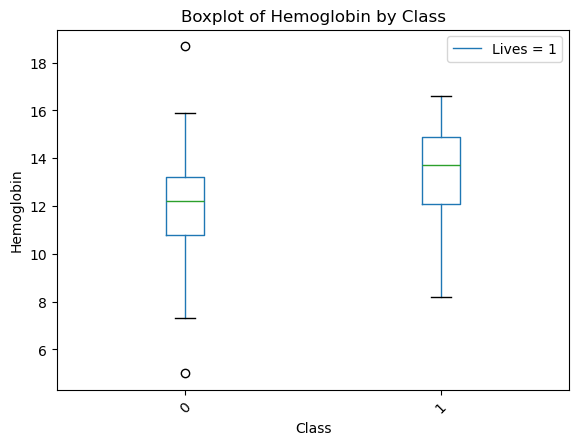

In [233]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Hemoglobin', by='Class', grid=False)
plt.title('Boxplot of Hemoglobin by Class')
plt.xlabel('Class')
plt.ylabel('Hemoglobin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

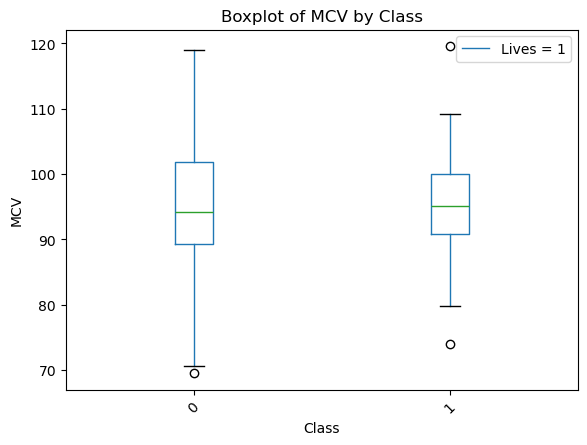

In [234]:

plt.figure(figsize=(8, 6))
df.boxplot(column='MCV', by='Class', grid=False)
plt.title('Boxplot of MCV by Class')
plt.xlabel('Class')
plt.ylabel('MCV')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

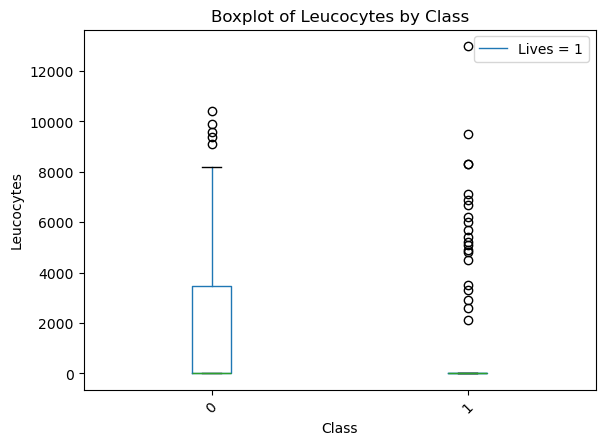

In [235]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Leucocytes', by='Class', grid=False)
plt.title('Boxplot of Leucocytes by Class')
plt.xlabel('Class')
plt.ylabel('Leucocytes')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

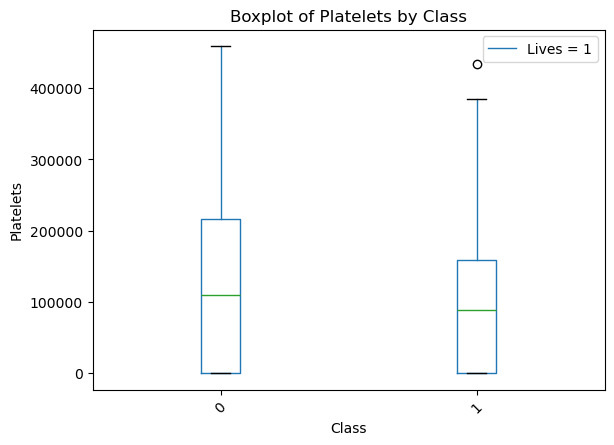

In [236]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Platelets', by='Class', grid=False)
plt.title('Boxplot of Platelets by Class')
plt.xlabel('Class')
plt.ylabel('Platelets')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

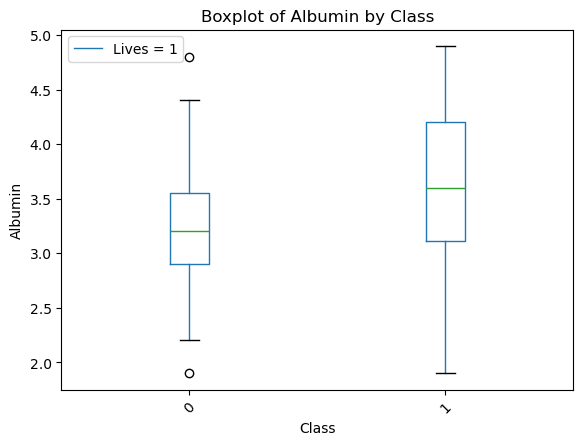

In [237]:

plt.figure(figsize=(8, 6))
df.boxplot(column=' Albumin', by='Class', grid=False)
plt.title('Boxplot of Albumin by Class')
plt.xlabel('Class')
plt.ylabel('Albumin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()



<Figure size 800x600 with 0 Axes>

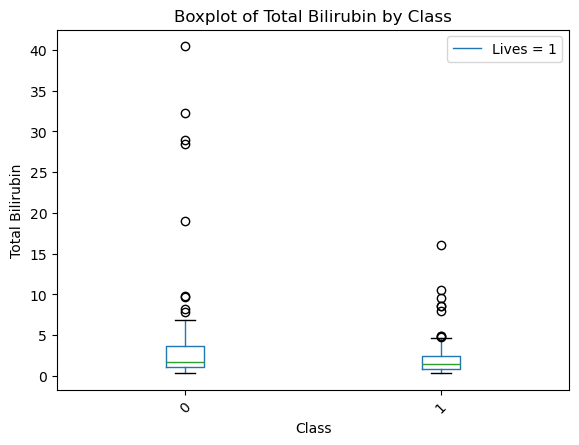

In [238]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Total_Bil', by='Class', grid=False)
plt.title('Boxplot of Total Bilirubin by Class')
plt.xlabel('Class')
plt.ylabel('Total Bilirubin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

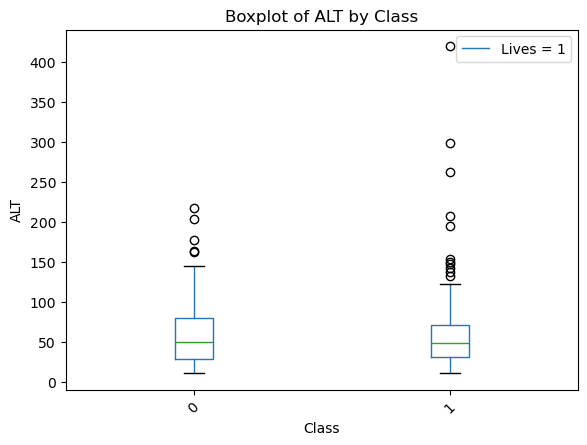

In [239]:

plt.figure(figsize=(8, 6))
df.boxplot(column='ALT', by='Class', grid=False)
plt.title('Boxplot of ALT by Class')
plt.xlabel('Class')
plt.ylabel('ALT')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

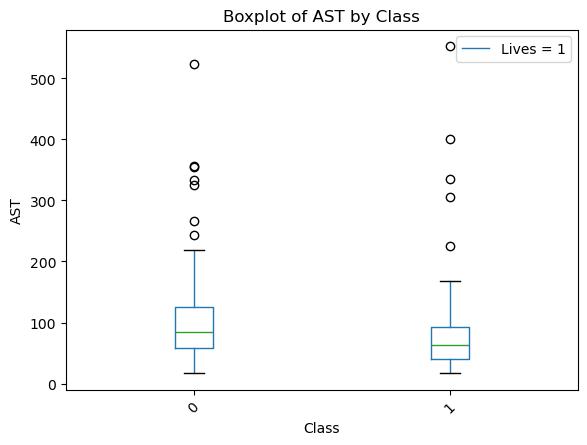

In [240]:

plt.figure(figsize=(8, 6))
df.boxplot(column='AST', by='Class', grid=False)
plt.title('Boxplot of AST by Class')
plt.xlabel('Class')
plt.ylabel('AST')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

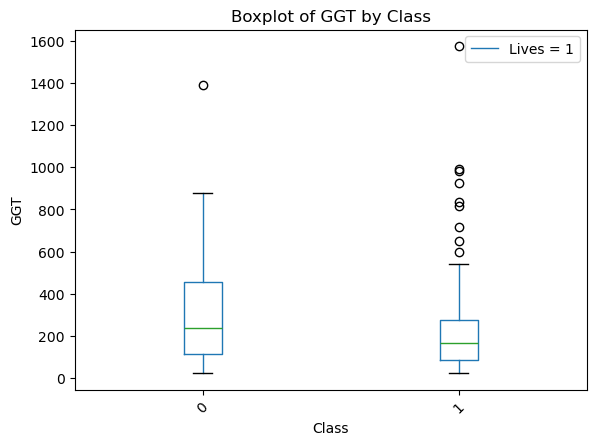

In [241]:

plt.figure(figsize=(8, 6))
df.boxplot(column='GGT', by='Class', grid=False)
plt.title('Boxplot of GGT by Class')
plt.xlabel('Class')
plt.ylabel('GGT')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

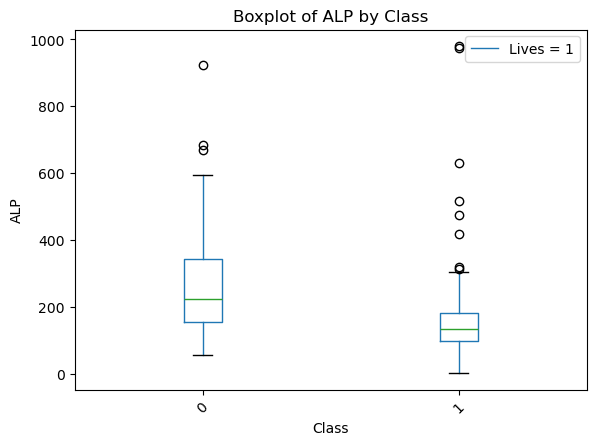

In [242]:

plt.figure(figsize=(8, 6))
df.boxplot(column='ALP', by='Class', grid=False)
plt.title('Boxplot of ALP by Class')
plt.xlabel('Class')
plt.ylabel('ALP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

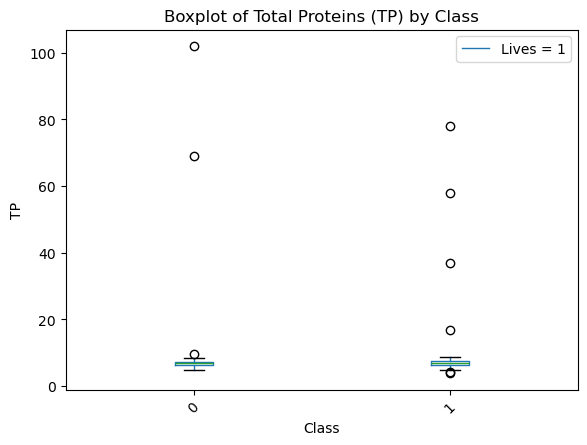

In [243]:

plt.figure(figsize=(8, 6))
df.boxplot(column='TP', by='Class', grid=False)
plt.title('Boxplot of Total Proteins (TP) by Class')
plt.xlabel('Class')
plt.ylabel('TP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

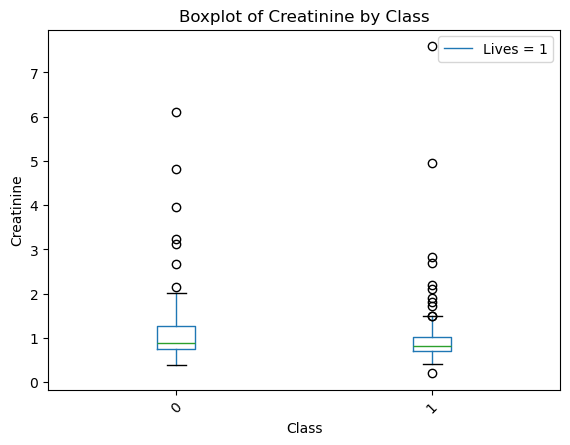

In [244]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Creatinine', by='Class', grid=False)
plt.title('Boxplot of Creatinine by Class')
plt.xlabel('Class')
plt.ylabel('Creatinine')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

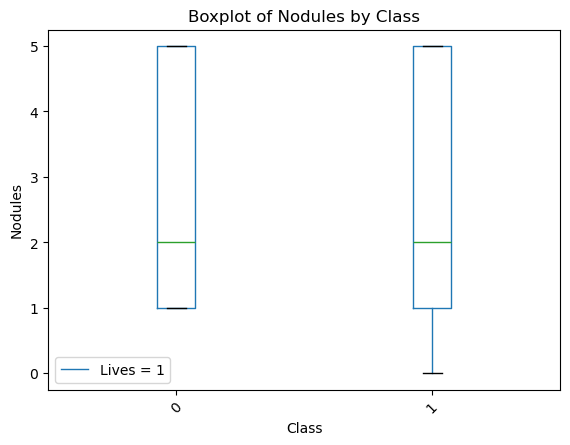

In [245]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Nodules', by='Class', grid=False)
plt.title('Boxplot of Nodules by Class')
plt.xlabel('Class')
plt.ylabel('Nodules')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

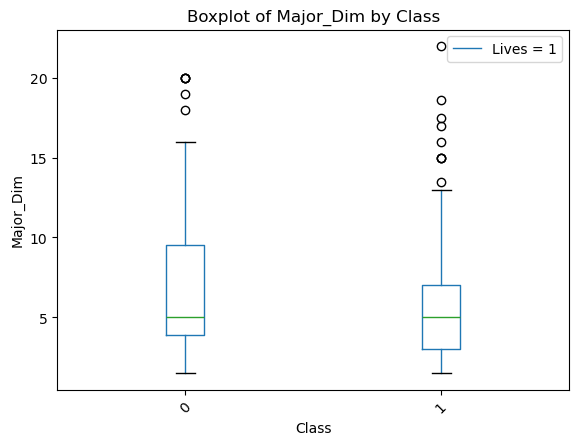

In [246]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Major_Dim', by='Class', grid=False)
plt.title('Boxplot of Major_Dim by Class')
plt.xlabel('Class')
plt.ylabel('Major_Dim')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

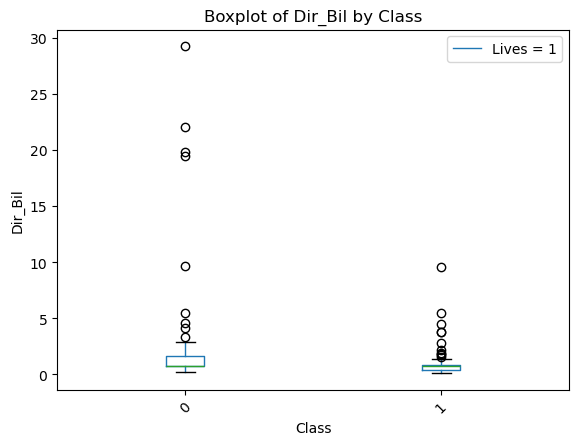

In [247]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Dir_Bil', by='Class', grid=False)
plt.title('Boxplot of Dir_Bil by Class')
plt.xlabel('Class')
plt.ylabel('Dir_Bil')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

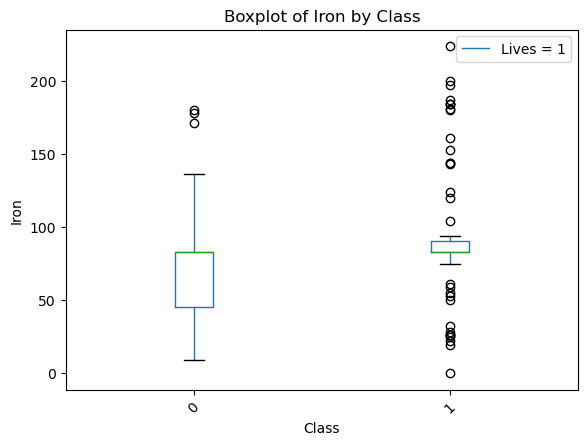

In [248]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Iron', by='Class', grid=False)
plt.title('Boxplot of Iron by Class')
plt.xlabel('Class')
plt.ylabel('Iron')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

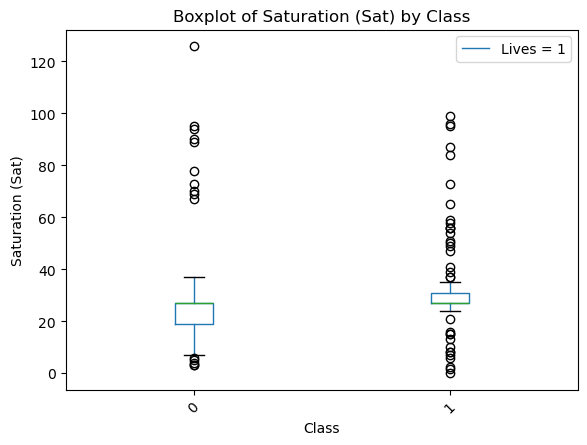

In [249]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Sat', by='Class', grid=False)
plt.title('Boxplot of Saturation (Sat) by Class')
plt.xlabel('Class')
plt.ylabel('Saturation (Sat)')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

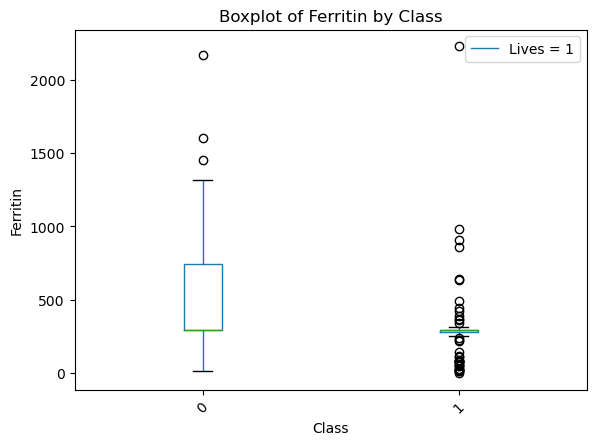

In [250]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Ferritin', by='Class', grid=False)
plt.title('Boxplot of Ferritin by Class')
plt.xlabel('Class')
plt.ylabel('Ferritin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


Através do gráficos acima, analisamos cada uma das diferentes variáveis para avaliar a sua importância na determinação da sobrevivência de pacientes com carcinoma hepatocelular.

A qualidade de uma variável é medida de acordo com a sua implicação na sobrevivência dos pacientes que a apresentam.
As seguintes variáveis foram eliminadas:
- Symptoms - Com sintomas a distinção entre pacientes que vivem e morrem é menor que 10%
- Diabetes - Com sintomas a distinção entre pacientes que vivem e morrem é menor que 10%
- HbeAg - Como apenas 1 paciente de 165 apresenta esta variável positiva, esta não é fiavél
- HIV - Como apenas 3 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- Endemic - Como apenas 10 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- Hemochro - Como apenas 7 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- HCVAb - A diferença do número de pacientes que vive/morre, quando esta variável está presente, não é significativa
- NASH - Como apenas 8 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- Grams_day - Não existe diferença significativa de valores nos pacientes que vivem/morrem
- INR - Não existe diferença significativa de valores nos pacientes que vivem/morrem
- Total_Bil - Não existe diferença significativa de valores nos pacientes que vivem/morrem
- TP - Não existe diferença significativa de valores nos pacientes que vivem/morrem



**Vamos avaliar a accuracy dos modelos antes e depois das variaveis eliminadas**

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Class'])  
y = df['Class']


# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
dt.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))


Accuracy: 64.00%
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.68      0.68      0.68        28

    accuracy                           0.64        50
   macro avg       0.63      0.63      0.63        50
weighted avg       0.64      0.64      0.64        50



In [261]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df.drop(columns=['Class'])  
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Converter DataFrames para arrays NumPy e garantir contiguidade de memória
X_train = np.ascontiguousarray(X_train.values)
X_test = np.ascontiguousarray(X_test.values)
y_train = np.ascontiguousarray(y_train.values)
y_test = np.ascontiguousarray(y_test.values)

# Criar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)  # n_neighbors pode ser ajustado conforme necessário

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))


Accuracy: 62.00%
              precision    recall  f1-score   support

           0       0.62      0.36      0.46        22
           1       0.62      0.82      0.71        28

    accuracy                           0.62        50
   macro avg       0.62      0.59      0.58        50
weighted avg       0.62      0.62      0.60        50



In [262]:
#Apaguei só as que menos de 10% dos pacientes tinham ou não a doença/virus
df.drop(columns=['HBeAg', 'HIV', 'Endemic', 'Hemochro', 'NASH'], inplace=True)

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Class'])  
y = df['Class']

#'HBeAg','Endemic','Grams_day', 'HBcAb', 'Metastasis'

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
dt.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))


Accuracy: 70.00%
              precision    recall  f1-score   support

           0       0.67      0.64      0.65        22
           1       0.72      0.75      0.74        28

    accuracy                           0.70        50
   macro avg       0.70      0.69      0.69        50
weighted avg       0.70      0.70      0.70        50



In [268]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df.drop(columns=['Class'])  
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Converter DataFrames para arrays NumPy e garantir contiguidade de memória
X_train = np.ascontiguousarray(X_train.values)
X_test = np.ascontiguousarray(X_test.values)
y_train = np.ascontiguousarray(y_train.values)
y_test = np.ascontiguousarray(y_test.values)

# Criar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=50)  # n_neighbors pode ser ajustado conforme necessário

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))


Accuracy: 56.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.56      1.00      0.72        28

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50



/home/maria/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maria/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maria/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
